# Importing necessary libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import re
import urllib
import statistics
from scipy.stats import chi2
from collections import Counter
import matplotlib.pylab as plt
from bs4 import BeautifulSoup
import seaborn as sns
pd.set_option('display.max_colwidth', None)
from IPython.display import HTML
style = "<style>div.exercise { background-color: #ffcccc;border-color: #E9967A; border-left: 5px solid #800080; padding: 0.5em;}</style>"
HTML(style)

# Reading our dataset

In [2]:
complains = pd.read_csv("complaints.csv")

C:\Users\elraies\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Exploring it..

In [3]:
complains.head(20)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,5/3/2019,Student loan,Private student loan,Struggling to repay your loan,Can't get other flexible options for repaying your loan,NaN,NaN,Ameritech Financial,FL,33023.0,NaN,Consent not provided,Web,5/15/2019,Untimely response,No,NaN,3231257
1,2/14/2022,"Money transfer, virtual currency, or money service",Domestic (US) money transfer,Other transaction problem,NaN,NaN,NaN,JPMORGAN CHASE & CO.,CA,95835.0,Older American,NaN,Web,2/14/2022,Closed with explanation,Yes,NaN,5221354
2,2/19/2022,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the CFPB and chooses not to provide a public response,Experian Information Solutions Inc.,CA,91356.0,NaN,Consent not provided,Web,2/19/2022,Closed with non-monetary relief,Yes,NaN,5241345
3,2/20/2022,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Problem with a credit reporting company's investigation into an existing problem,Their investigation did not fix an error on your report,NaN,Company has responded to the consumer and the CFPB and chooses not to provide a public response,Experian Information Solutions Inc.,GA,31707.0,NaN,Consent not provided,Web,2/20/2022,Closed with explanation,Yes,NaN,5242269
4,2/28/2022,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",PA,19151.0,NaN,NaN,Web,2/28/2022,In progress,Yes,NaN,5267863
5,2/17/2022,Credit card or prepaid card,General-purpose credit card or charge card,Getting a credit card,Application denied,NaN,NaN,Alliance Data Card Services,TX,78728.0,NaN,NaN,Web,2/17/2022,Closed with explanation,Yes,NaN,5229630
6,2/19/2022,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the CFPB and chooses not to provide a public response,Experian Information Solutions Inc.,AL,35405.0,NaN,Consent not provided,Web,2/19/2022,Closed with non-monetary relief,Yes,NaN,5240132
7,2/14/2022,Debt collection,Credit card debt,Communication tactics,Frequent or repeated calls,NaN,Company believes it acted appropriately as authorized by contract or law,Torriere Holdings INC,AR,71701.0,NaN,Consent not provided,Web,2/28/2022,Closed with explanation,Yes,NaN,5220796
8,12/8/2021,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Problem with a credit reporting company's investigation into an existing problem,Their investigation did not fix an error on your report,"First Progress Card was notified throughout the year 2021 in regards to inaccurate reporting to the bureaus. As a consumer who suffered from XXXX in 2021 and was protected under ( "" CARES Act '' ) Pub.L. 116-136. First Progress Card was supposed to responsibility investigate and take proper action to determine if they made good faith efforts to investigate disputes. Whereas, this company did not. In XXXX, the consumer 's account was reported as 30 days late. Where payments were made and arrangements were requested due to XXXX. XX/XX/2021 "" First Progress Card '' reported the account as 30 days late again. Then 60 days late in XXXX and reflected as current in XX/XX/2021. The discrepancies continued, where XXXX reflected 30 days late and XX/XX/2021 as 60 days late. Then current in XXXX and back to 30 days late in XX/XX/2021 and 60 days late in XXXX. Finally, with noticing the discrepancies and lack of suppo

# Dropping unnecessary columns and rows and duplicates

We will drop columns and rows that won't be useful in our analysis.

The rows that will be dropped may contain null values in some vital columns for the analysis,therefore they won't be useful.

Some columns also may not be useful despite they don't have a single null value.

In [4]:
complains.drop_duplicates()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,5/3/2019,Student loan,Private student loan,Struggling to repay your loan,Can't get other flexible options for repaying your loan,NaN,NaN,Ameritech Financial,FL,33023.0,NaN,Consent not provided,Web,5/15/2019,Untimely response,No,NaN,3231257
1,2/14/2022,"Money transfer, virtual currency, or money service",Domestic (US) money transfer,Other transaction problem,NaN,NaN,NaN,JPMORGAN CHASE & CO.,CA,95835.0,Older American,NaN,Web,2/14/2022,Closed with explanation,Yes,NaN,5221354
2,2/19/2022,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the CFPB and chooses not to provide a public response,Experian Information Solutions Inc.,CA,91356.0,NaN,Consent not provided,Web,2/19/2022,Closed with non-monetary relief,Yes,NaN,5241345
3,2/20/2022,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Problem with a credit reporting company's investigation into an existing problem,Their investigation did not fix an error on your report,NaN,Company has responded to the consumer and the CFPB and chooses not to provide a public response,Experian Information Solutions Inc.,GA,31707.0,NaN,Consent not provided,Web,2/20/2022,Closed with explanation,Yes,NaN,5242269
4,2/28/2022,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",PA,19151.0,NaN,NaN,Web,2/28/2022,In progress,Yes,NaN,5267863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,11/25/2014,Student loan,Non-federal student loan,Can't repay my loan,Can't decrease my monthly payments,NaN,NaN,"Navient Solutions, LLC.",GA,31033.0,NaN,NaN,Referral,12/2/2014,Closed with explanation,Yes,No,1131040
1048571,4/12/2014,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",NaN,NaN,NaN,"SELECT PORTFOLIO SERVICING, INC.",CA,90701.0,NaN,NaN,Web,4/11/2014,Closed with explanation,Yes,No,806243
1048572,4/27/2016,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,NATIONSTAR MORTGAGE,WA,98144.0,NaN,NaN,Referral,4/28/2016,Closed,Yes,No,1899929
1048573,8/24/2015,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,NATIONSTAR MORTGAGE,MI,48301.0,NaN,Consent not provided,Web,8/24/2015,Closed with explanation,Yes,No,1534248


In [5]:
complains=complains.dropna(axis=0, subset=['Date received','Sub-product','Sub-issue','ZIP code','State','Complaint ID'],inplace=False)

In [6]:
complains.isnull().sum()

Date received                         0
Product                               0
Sub-product                           0
Issue                                 0
Sub-issue                             0
Consumer complaint narrative    1051700
Company public response          932564
Company                               0
State                                 0
ZIP code                              0
Tags                            1556356
Consumer consent provided?       295000
Submitted via                         0
Date sent to company                  0
Company response to consumer          3
Timely response?                      0
Consumer disputed?              1561927
Complaint ID                          0
dtype: int64

In [6]:
del complains['Company public response']
del complains['Consumer disputed?']

In [7]:
complains.head(20)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,5/3/2019,Student loan,Private student loan,Struggling to repay your loan,Can't get other flexible options for repaying your loan,NaN,Ameritech Financial,FL,33023.0,NaN,Consent not provided,Web,5/15/2019,Untimely response,No,3231257
2,2/19/2022,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Experian Information Solutions Inc.,CA,91356.0,NaN,Consent not provided,Web,2/19/2022,Closed with non-monetary relief,Yes,5241345
3,2/20/2022,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Problem with a credit reporting company's investigation into an existing problem,Their investigation did not fix an error on your report,NaN,Experian Information Solutions Inc.,GA,31707.0,NaN,Consent not provided,Web,2/20/2022,Closed with explanation,Yes,5242269
4,2/28/2022,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,"EQUIFAX, INC.",PA,19151.0,NaN,NaN,Web,2/28/2022,In progress,Yes,5267863
5,2/17/2022,Credit card or prepaid card,General-purpose credit card or charge card,Getting a credit card,Application denied,NaN,Alliance Data Card Services,TX,78728.0,NaN,NaN,Web,2/17/2022,Closed with explanation,Yes,5229630
6,2/19/2022,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Experian Information Solutions Inc.,AL,35405.0,NaN,Consent not provided,Web,2/19/2022,Closed with non-monetary relief,Yes,5240132
7,2/14/2022,Debt collection,Credit card debt,Communication tactics,Frequent or repeated calls,NaN,Torriere Holdings INC,AR,71701.0,NaN,Consent not provided,Web,2/28/2022,Closed with explanation,Yes,5220796
8,12/8/2021,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Problem with a credit reporting company's investigation into an existing problem,Their investigation did not fix an error on your report,"First Progress Card was notified throughout the year 2021 in regards to inaccurate reporting to the bureaus. As a consumer who suffered from XXXX in 2021 and was protected under ( "" CARES Act '' ) Pub.L. 116-136. First Progress Card was supposed to responsibility investigate and take proper action to determine if they made good faith efforts to investigate disputes. Whereas, this company did not. In XXXX, the consumer 's account was reported as 30 days late. Where payments were made and arrangements were requested due to XXXX. XX/XX/2021 "" First Progress Card '' reported the account as 30 days late again. Then 60 days late in XXXX and reflected as current in XX/XX/2021. The discrepancies continued, where XXXX reflected 30 days late and XX/XX/2021 as 60 days late. Then current in XXXX and back to 30 days late in XX/XX/2021 and 60 days late in XXXX. Finally, with noticing the discrepancies and lack of support and good faith reporting during XXXX XXXX. First Progress Card was notified on XX/XX/2021 regarding suffering from XXXX personally in XXXX and attempting to recover. Whereas the correspondent stated to send a letter in via FAX to further explain that I had XXXX after providing account and identity information as requested regarding the account. Awaiting relief "" Good Will '' letters and "" Negative Item Reporting '' disputes were sent off to the bureaus on XX/XX/2021, and again on XX/XX/2021. It was First Progress Card due diligence to investigate this account with good faith. Concluding, reporting more discrepancies with the account as follows being reported as curren

# Encoding the necessary values in the dataset
Some values have a data type that is not suitable for it and will cause problen further in the analysis when anwering our questions

In [8]:
complains.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Complaint ID                     int64
dtype: object

As we can see above , some columns are defined with a data type that is not suitable for it . for example , the ZIP code cannot be an object it must be an integer

# Converting Zip code to integer and removing floating points and special characters
this is a common issue in most datasets but we will deal with it right now

In [9]:
complains.loc[1:40,'ZIP code']

2     91356.0
3     31707.0
4     19151.0
5     78728.0
6     35405.0
7     71701.0
8     19805.0
9     49333.0
10    33313.0
12    20744.0
13    21218.0
14    84087.0
15    35126.0
16    30901.0
17    32810.0
18    85069.0
19    19111.0
20    11209.0
21    48089.0
22    19118.0
23    11729.0
24    90262.0
25    70127.0
26    33170.0
27    33026.0
28    93560.0
29    90037.0
30    19444.0
31    19143.0
32    60827.0
33    19124.0
34    20785.0
35    19067.0
37    40212.0
38    64015.0
39    21737.0
Name: ZIP code, dtype: object

In [10]:
special_char = ['"', '*', '/', '(', ')', ':', '\n','-','+','=','`','$','%','^','!','.',' ']

special_char_escaped = list(map(re.escape, special_char))

complains['ZIP code'] = complains['ZIP code'].replace(special_char_escaped, '', regex=True)

special_char_escaped = list(map(re.escape, special_char))

complains['ZIP code'] = complains['ZIP code'].replace(special_char_escaped, '', regex=True)

complains['ZIP code'] = complains['ZIP code'].astype(int)

# Let's take a look again...

In [15]:
complains.loc[1:40,'ZIP code']

1     20744
2     32771
3     90723
4     11377
5     33311
6     33313
8     19805
9     43216
10    77373
11    48089
12    70127
13    80916
14    60423
15    93560
16    90037
17    28314
18    20785
19    19067
20    19444
22    80204
23    66061
26    90047
27    19468
28     6811
29    20772
30    72715
31    33407
32    11214
33    91711
34    94544
35     6010
36    44663
37    30429
38    33025
39    18640
Name: ZIP code, dtype: int32

## Do the same for dates values

In [14]:
complains["Date received"]= pd.to_datetime(complains["Date received"])
complains.dtypes
complains.loc[:40,'Date received']

0    2019-05-03
2    2022-02-19
3    2022-02-20
4    2022-02-28
5    2022-02-17
6    2022-02-19
7    2022-02-14
8    2021-12-08
9    2022-02-24
10   2019-05-02
12   2021-12-31
13   2022-02-19
14   2022-02-22
15   2022-02-21
16   2022-02-18
17   2022-02-28
18   2022-01-31
19   2022-02-28
20   2022-02-17
21   2018-04-15
22   2022-02-02
23   2022-02-18
24   2022-02-28
25   2019-01-10
26   2022-02-19
27   2022-02-16
28   2019-02-17
29   2019-02-28
30   2019-03-01
31   2022-01-31
32   2022-02-28
33   2022-02-28
34   2019-04-01
35   2019-04-01
37   2022-02-15
38   2022-02-18
39   2022-02-28
Name: Date received, dtype: datetime64[ns]

In [15]:
complains["Date sent to company"]= pd.to_datetime(complains["Date sent to company"])
complains.dtypes

Date received                   datetime64[ns]
Product                                 object
Sub-product                             object
Issue                                   object
Sub-issue                               object
Consumer complaint narrative            object
Company                                 object
State                                   object
ZIP code                                 int32
Tags                                    object
Consumer consent provided?              object
Submitted via                           object
Date sent to company            datetime64[ns]
Company response to consumer            object
Timely response?                        object
Complaint ID                             int64
dtype: object

### Check for the change...

In [16]:
complains.dtypes

Date received                   datetime64[ns]
Product                                 object
Sub-product                             object
Issue                                   object
Sub-issue                               object
Consumer complaint narrative            object
Company                                 object
State                                   object
ZIP code                                 int32
Tags                                    object
Consumer consent provided?              object
Submitted via                           object
Date sent to company            datetime64[ns]
Company response to consumer            object
Timely response?                        object
Complaint ID                             int64
dtype: object

# ————————————————————————————————————

# Aggregation and visualization

# The most preferable complaint submission and can their timely respone refer to the fact that consumers prefer these most frequent methods?

let's plot the 'submitted via' column with respect to the 'date received' column

<AxesSubplot:>

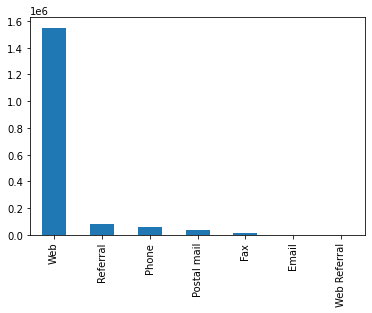

In [19]:
complains['Submitted via'].value_counts().plot.bar()

### See the amount and the most used using `.describe()`

In [20]:
complains['Submitted via'].describe()

count     1733641
unique          7
top           Web
freq      1550622
Name: Submitted via, dtype: object

In [21]:
var = complains.groupby(complains['Submitted via'])

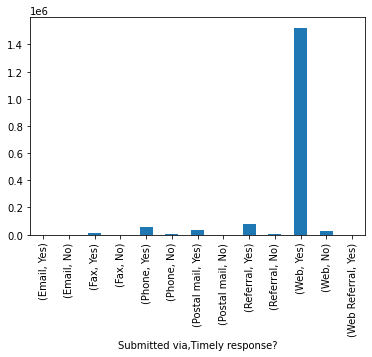

In [22]:
var_2 = var['Timely response?'].value_counts().plot.bar()

In [23]:
var['Timely response?'].describe()

,count,unique,top,freq
Submitted via,,,,
Email,55,2,Yes,53
Fax,14214,2,Yes,13927
Phone,55714,2,Yes,54102
Postal mail,33599,2,Yes,32865
Referral,79408,2,Yes,78099
Web,1550622,2,Yes,1523676
Web Referral,29,1,Yes,29


### All of the submission methods have a high timely response ratio but the most used one and better method is `Web`

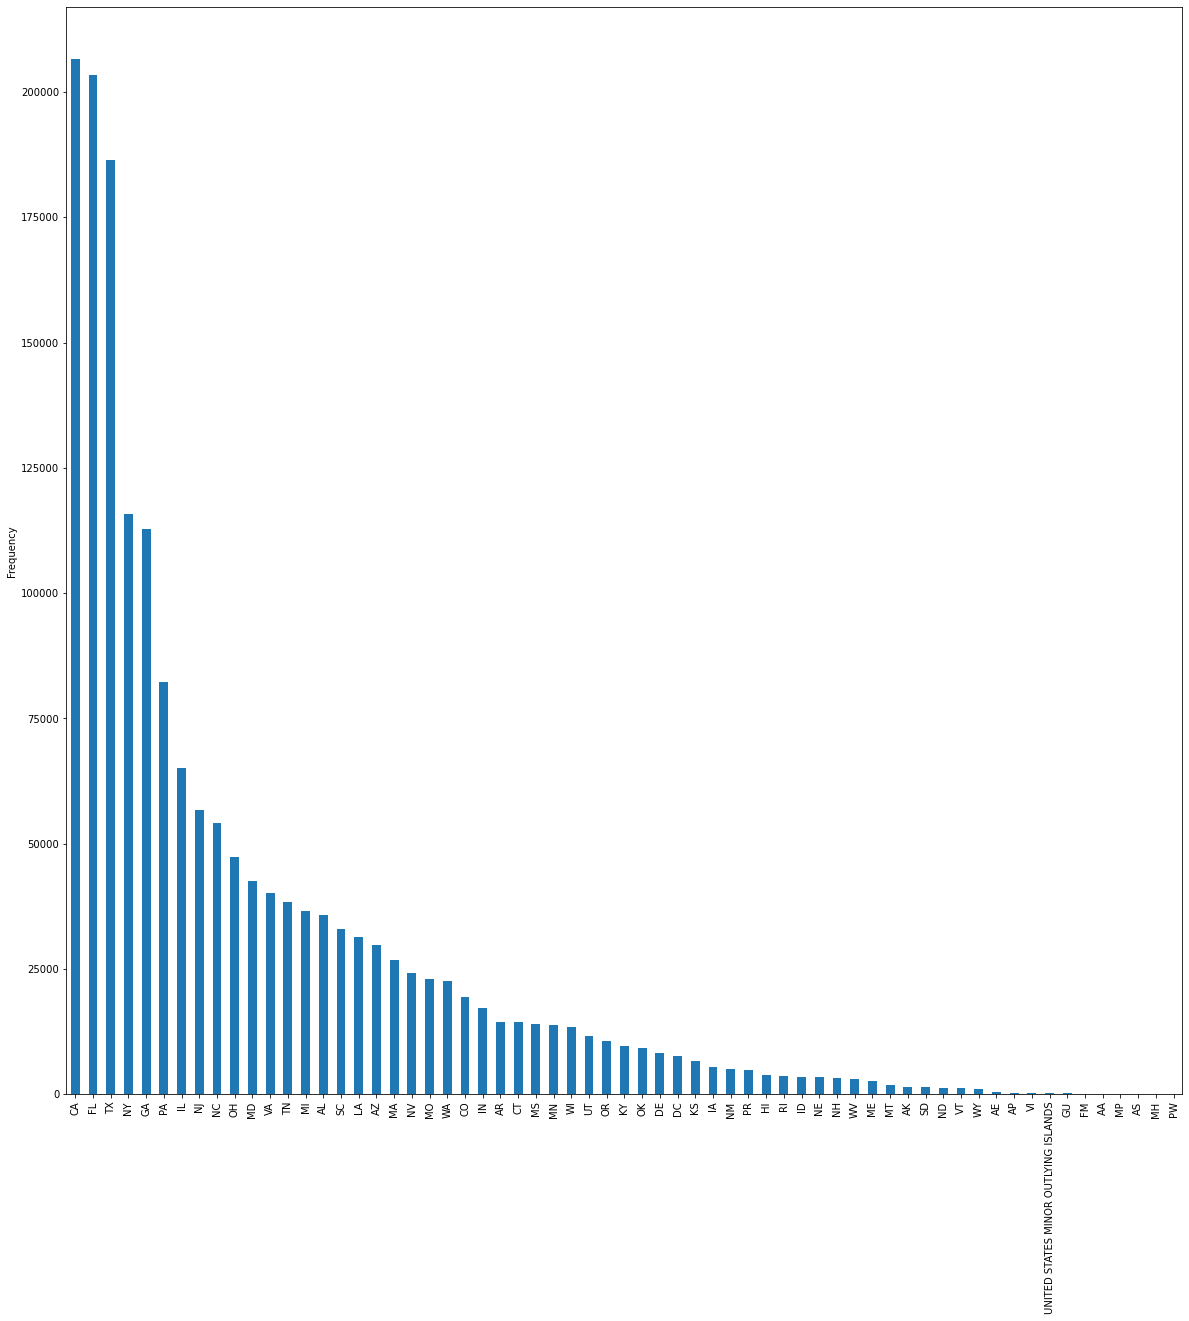

In [24]:
complains.groupby('State').size().plot.hist(figsize=(20,20))
CA = complains['State'].value_counts().plot.bar()

## `CA` (California) is the state that has a high frequency in terms of complaints

# —————————————————————————————————————

  
  
 ## Ziad Mostafa 201541
  
  
  
  

## Q1

## Did the issues increase over the course of a year? 

### I will try to compare between the number of issues in a specific month in a year and the number of issues in that same month but in the year after.

### With that comparision i will try to conclude if the number of issues increased over the course of 3 years. 

Filtering the dates with the issues corresponding to it...

### Dates for the year `2020-01`

In [17]:
x = complains.loc[(complains['Date received']=='2020-01') & (complains['Issue']== 'Incorrect information on your report') ,['Date received','Issue']]

x.head()

,Date received,Issue
1695,2020-01-01,Incorrect information on your report
28864,2020-01-01,Incorrect information on your report
52702,2020-01-01,Incorrect information on your report
58304,2020-01-01,Incorrect information on your report
62781,2020-01-01,Incorrect information on your report


### Dates for the year `2021-01`

In [18]:
x1 = complains.loc[(complains['Date received']=='2021-01') & (complains['Issue'] == 'Incorrect information on your report') ,['Date received','Issue']]
x1.head()

,Date received,Issue
180674,2021-01-01,Incorrect information on your report
252113,2021-01-01,Incorrect information on your report
276531,2021-01-01,Incorrect information on your report
638849,2021-01-01,Incorrect information on your report
644047,2021-01-01,Incorrect information on your report


### Dates for the year `2022-01`

In [19]:
x2 = complains.loc[(complains['Date received']=='2022-01') & (complains['Issue'] == 'Incorrect information on your report') ,['Date received','Issue']]
x2.head()

,Date received,Issue
2297,2022-01-01,Incorrect information on your report
4038,2022-01-01,Incorrect information on your report
5027,2022-01-01,Incorrect information on your report
5983,2022-01-01,Incorrect information on your report
6434,2022-01-01,Incorrect information on your report


## Checking if the service has improved or not

In [20]:
x.describe()

C:\Users\elraies\AppData\Local\Temp/ipykernel_17416/1655674568.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  x.describe()


,Date received,Issue
count,80,80
unique,1,1
top,2020-01-01 00:00:00,Incorrect information on your report
freq,80,80
first,2020-01-01 00:00:00,NaN
last,2020-01-01 00:00:00,NaN


In [21]:
x1.describe()

C:\Users\elraies\AppData\Local\Temp/ipykernel_17416/2584564492.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  x1.describe()


,Date received,Issue
count,105,105
unique,1,1
top,2021-01-01 00:00:00,Incorrect information on your report
freq,105,105
first,2021-01-01 00:00:00,NaN
last,2021-01-01 00:00:00,NaN


In [22]:
x2.describe()

C:\Users\elraies\AppData\Local\Temp/ipykernel_17416/489618872.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  x2.describe()


,Date received,Issue
count,50,50
unique,1,1
top,2022-01-01 00:00:00,Incorrect information on your report
freq,50,50
first,2022-01-01 00:00:00,NaN
last,2022-01-01 00:00:00,NaN


## Plotting the counts to get  a better look

Text(0, 0.5, 'Issues number in 2022-01')

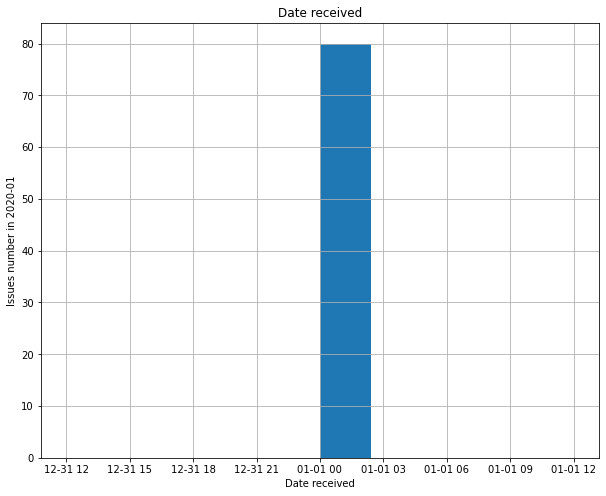

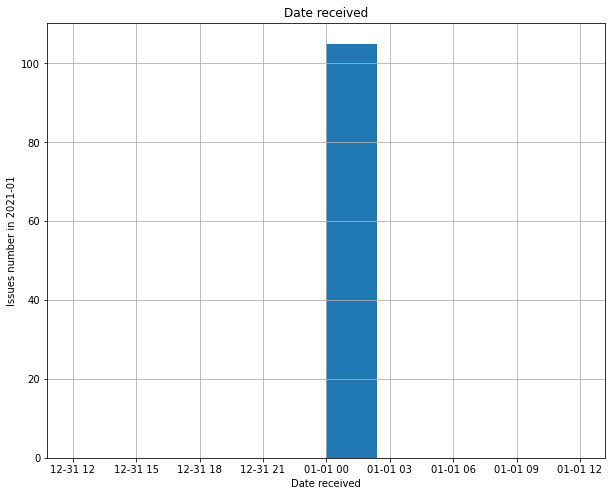

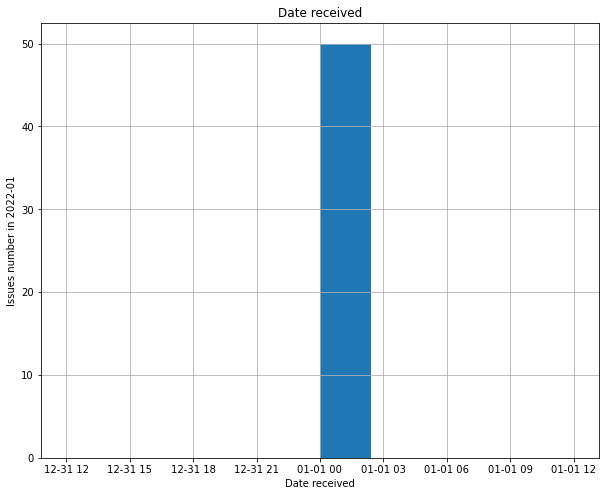

In [23]:
x.hist(figsize= (10,8))
plt.xlabel('Date received')
plt.ylabel('Issues number in 2020-01')

x1.hist(figsize = (10,8))
plt.xlabel('Date received')
plt.ylabel('Issues number in 2021-01')

x2.hist(figsize=(10,8))
plt.xlabel('Date received')
plt.ylabel('Issues number in 2022-01')

# What's the Product that a company receives through ZIP code in a specific state

Try to get the most received Product for a company by zip code of specific state , to know which Product the company have trouble within to help trying to solve it

## Here i'm trying to find out the product that is in a specific state to know the problem and know the type of people 

In [24]:
stat = complains[complains['State']=='FL']
stat

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2019-05-03,Student loan,Private student loan,Struggling to repay your loan,Can't get other flexible options for repaying your loan,NaN,Ameritech Financial,FL,33023,NaN,Consent not provided,Web,2019-05-15,Untimely response,No,3231257
10,2019-05-02,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Experian Information Solutions Inc.,FL,33313,NaN,Other,Web,2019-05-02,Closed with explanation,Yes,3229956
17,2022-02-28,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,"EQUIFAX, INC.",FL,32810,NaN,NaN,Web,2022-02-28,In progress,Yes,5267862
26,2022-02-19,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Problem with a credit reporting company's investigation into an existing problem,Their investigation did not fix an error on your report,NaN,Experian Information Solutions Inc.,FL,33170,NaN,Consent not provided,Web,2022-02-19,Closed with non-monetary relief,Yes,5241423
27,2022-02-16,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't recognize,NaN,FIRST NATIONAL BANK OF OMAHA,FL,33026,NaN,Consent not provided,Web,2022-02-16,Closed with explanation,Yes,5228290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048405,2019-08-12,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Experian Information Solutions Inc.,FL,33063,NaN,Consent not provided,Web,2019-08-12,Closed with non-monetary relief,Yes,3336980
1048448,2020-06-15,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33993,NaN,Consent not provided,Web,2020-06-15,Closed with explanation,Yes,3699344
1048466,2016-03-16,Debt collection,Mortgage,False statements or representation,Attempted to collect wrong amount,NaN,"SELECT PORTFOLIO SERVICING, INC.",FL,33661,NaN,NaN,Referral,2016-03-18,Closed with explanation,Yes,1835412
1048486,2021-03-25,Checking or savings account,Checking account,Managing an account,Funds not handled or disbursed as instructed,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",FL,33617,NaN,NaN,Referral,2021-03-29,Closed with non-monetary relief,Yes,4255327


## Here we can see that the ZIP code of 'FL' is between '33023' , '35000'.


In [25]:

s1 = complains[complains['State'] == 'FL']
s1.loc[:,'ZIP code']

0          33023
10         33313
17         32810
26         33170
27         33026
           ...  
1048405    33063
1048448    33993
1048466    33661
1048486    33617
1048492    33169
Name: ZIP code, Length: 79916, dtype: int32

## Here we get the product that asked from that specific state `FL` and the companies that recevied it with the `ZIP_Code` 

In [26]:


ss = complains[complains['State'] == 'FL']
ss.loc[:,['Product','State','Company' , 'ZIP code']]


,Product,State,Company,ZIP code
0,Student loan,FL,Ameritech Financial,33023
10,"Credit reporting, credit repair services, or other personal consumer reports",FL,Experian Information Solutions Inc.,33313
17,"Credit reporting, credit repair services, or other personal consumer reports",FL,"EQUIFAX, INC.",32810
26,"Credit reporting, credit repair services, or other personal consumer reports",FL,Experian Information Solutions Inc.,33170
27,"Credit reporting, credit repair services, or other personal consumer reports",FL,FIRST NATIONAL BANK OF OMAHA,33026
...,...,...,...,...
1048405,"Credit reporting, credit repair services, or other personal consumer reports",FL,Experian Information Solutions Inc.,33063
1048448,"Credit reporting, credit repair services, or other personal consumer reports",FL,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",33993
1048466,Debt collection,FL,"SELECT PORTFOLIO SERVICING, INC.",33661
1048486,Checking or savings account,FL,"BANK OF AMERICA, NATIONAL ASSOCIATION",33617


# We show part of the data that we have because it can't be displayed all in one scatter plot.

# the part we are showing here we want to declare the number of zip codes in certain state `FL` that send to each company and how many they are .

# we can see that The companies 'Experian Information Solutions Inc.', `EQUIFAX, INC` & `TRANSUNION INTERMEDIATE HOLDINGS, INC.` received many product than any other companies in  specifically `FL`

Text(0.5, 1.0, 'No. of zipcode that sent to each company')

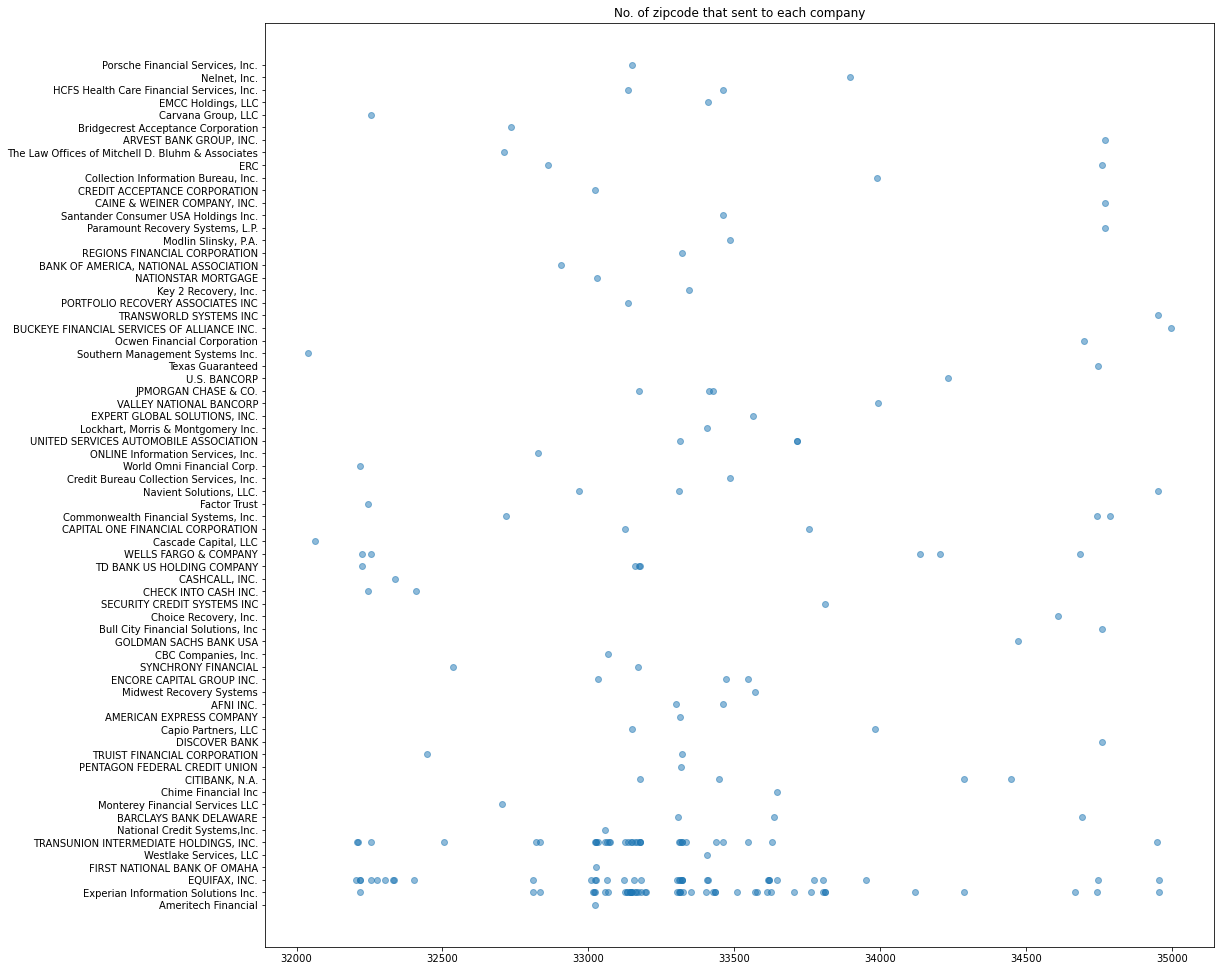

In [32]:

c = ss['ZIP code'].loc[:2000]
e = ss.Company.loc[0:2000]

plt.figure(figsize = (17,17))
plt.scatter(c, e, alpha=0.5)
plt.title("No. of zipcode that sent to each company")

In [ ]:
plt.figure

# From the sample of data we can see that the product that most consumers in `FL` see is `Credit reporting, credit repair services, or other personal consumer reports`

# The second product that consumer face as an issue is `Debt collection`. 

# This means that in `FL` the consumers use many Credit Cards & try to pay debt.

Text(0.5, 1.0, 'No. of zipcode that sent to each company')

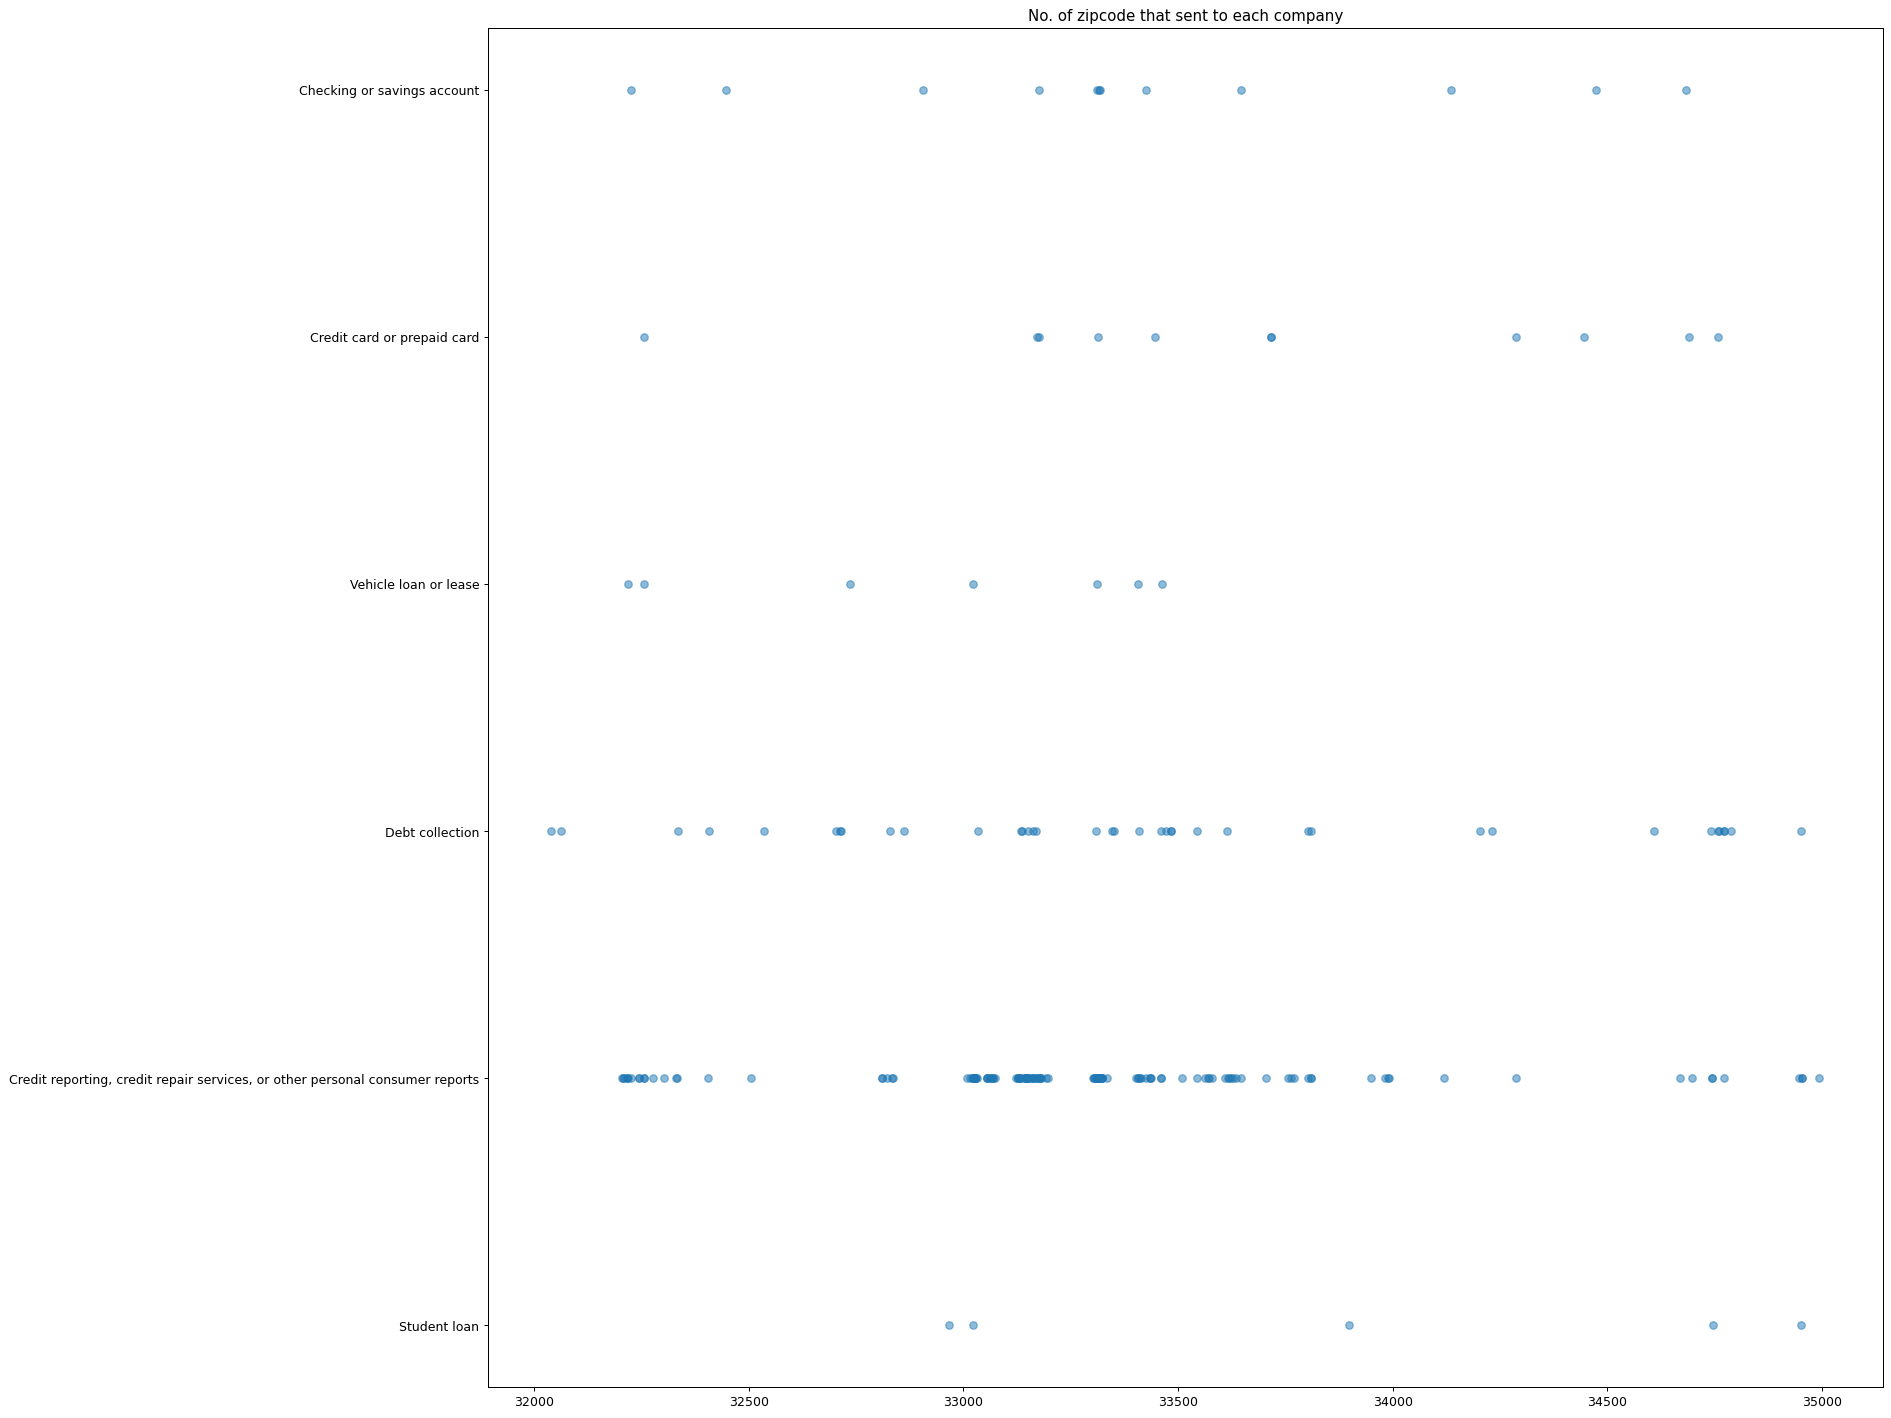

In [33]:

c = ss['ZIP code'].loc[0:2000]
e = ss.Product.loc[0:2000]

plt.figure(figsize=(20,20),dpi=90)
plt.scatter(c, e, alpha=0.5)
plt.title("No. of zipcode that sent to each company")

# ————————————————————————————————————

# Kareem Abdelhady 197155 

# Q1:- Which tag of a consumer may give him a privilege? 

Here we will check which consumer with tag `Older American` or `Service Provider` is more prioritized in terms of getting their complaints response quicker and their issues handled faster

## First, i will add a new column to the data set called `Num_Of_Days`
### i took the difference between the column `Date sent to company` and `Date received` to generate the amount of days the complaint took to be sent to the company 
### this column will be used to calculate the average days took to respond to the complains

In [727]:
complains['Num_Of_Days'] = (complains['Date sent to company']-complains['Date received']).dt.days

### This is the total number of days that all of the complaints took to be sent to the companies

In [730]:
statistics.fsum(complains['Num_Of_Days'])

2176518.0

In [732]:
statistics.mean(complains['Num_Of_Days'])

1.2554606172788945

All of the complaints took a total of 2176518 days to be sent to the company for all tags with an average of 1.25546 days 

## We will check the number of `Nan`s in the `Tags` so we can compare later on if the two tags have any priority in the first place


In [766]:
Tags_Nan=complains[complains['Tags'].isnull()]

In [767]:
Tags_Nan[["Date received","Tags","Date sent to company","Num_Of_Days"]]

,Date received,Tags,Date sent to company,Num_Of_Days
1,2021-12-31,NaN,2021-12-31,0
2,2022-03-06,NaN,2022-03-06,0
3,2022-03-13,NaN,2022-03-13,0
4,2020-06-21,NaN,2020-06-21,0
5,2022-03-20,NaN,2022-03-20,0
...,...,...,...,...
2550826,2019-03-09,NaN,2019-03-09,0
2550830,2019-01-09,NaN,2019-01-09,0
2550831,2019-03-07,NaN,2019-03-11,4
2550836,2017-03-04,NaN,2017-03-04,0


In [768]:
statistics.mean(Tags_Nan['Num_Of_Days'])

1.1632694594529884

### The average of consumers with no tags `Nan` has an average of 1.1632 day for their complains to be sent to the company

### Checking for the tag `Older American`

In [733]:
Tag_OA=complains[complains['Tags'] == 'Older American']

In [739]:
Tag_OA[["Date received","Tags","Date sent to company","Num_Of_Days"]]

,Date received,Tags,Date sent to company,Num_Of_Days
34,2019-08-09,Older American,2019-08-09,0
112,2020-04-08,Older American,2020-04-08,0
123,2022-03-02,Older American,2022-03-02,0
151,2019-03-06,Older American,2019-03-06,0
228,2022-03-18,Older American,2022-03-18,0
...,...,...,...,...
2550215,2018-09-12,Older American,2018-09-12,0
2550323,2018-07-22,Older American,2018-07-22,0
2550586,2018-12-26,Older American,2018-12-26,0
2550590,2018-10-09,Older American,2018-10-09,0


In [740]:
statistics.mean(Tag_OA['Num_Of_Days'])

2.663984443103333

Consumers with tag "Older American" has average of 2.663 days to be sent to the company

### Which year companies received complaints from `Older American`s

<AxesSubplot:>

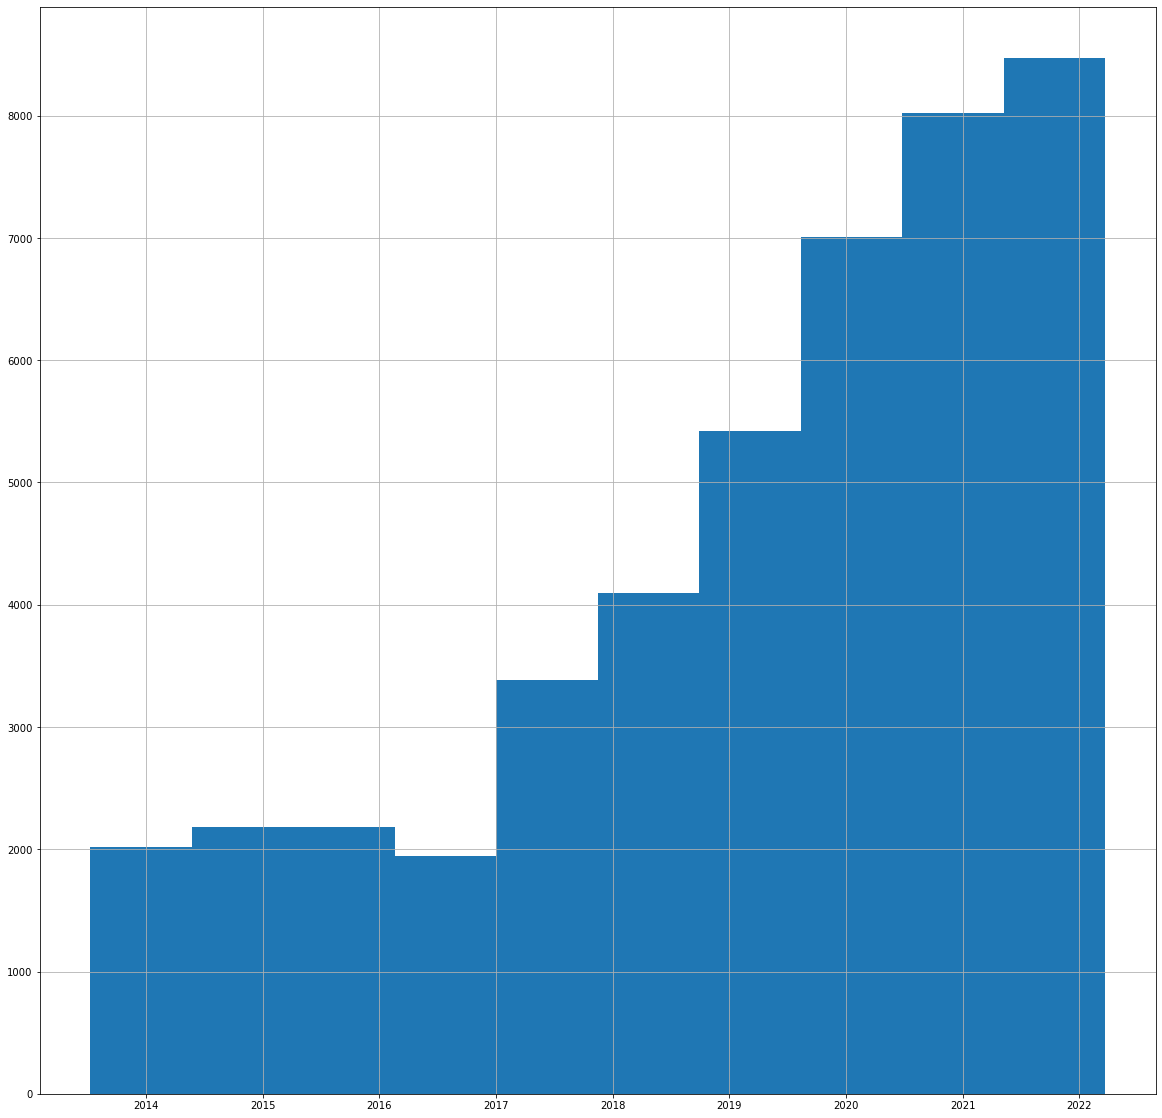

In [755]:
Tag_OA['Date sent to company'].hist(figsize=(20,20))

### Checking for the tag `Servicemember`

In [757]:
Tags_SM=complains[complains['Tags'] == 'Servicemember']

In [758]:
Tags_SM[["Date received","Tags","Date sent to company","Num_Of_Days"]]

,Date received,Tags,Date sent to company,Num_Of_Days
13,2019-02-17,Servicemember,2019-02-17,0
15,2019-02-17,Servicemember,2019-02-17,0
36,2019-03-26,Servicemember,2019-04-01,6
53,2019-07-25,Servicemember,2019-07-25,0
72,2019-07-12,Servicemember,2019-07-12,0
...,...,...,...,...
2550494,2018-01-19,Servicemember,2018-01-25,6
2550524,2018-11-16,Servicemember,2018-11-16,0
2550664,2019-01-24,Servicemember,2019-01-24,0
2550762,2019-02-01,Servicemember,2019-02-01,0



### This is the total number of days that all of the complaints took to be sent to the companies

In [761]:
statistics.fsum(Tags_SM['Num_Of_Days'])

149890.0

In [762]:
statistics.mean(Tags_SM['Num_Of_Days'])

1.330758645181338

Consumers with tag "Servicemember" has average of 1.33075 day to be sent to the company


### Which year companies received complaints from `Servicemember`s

<AxesSubplot:>

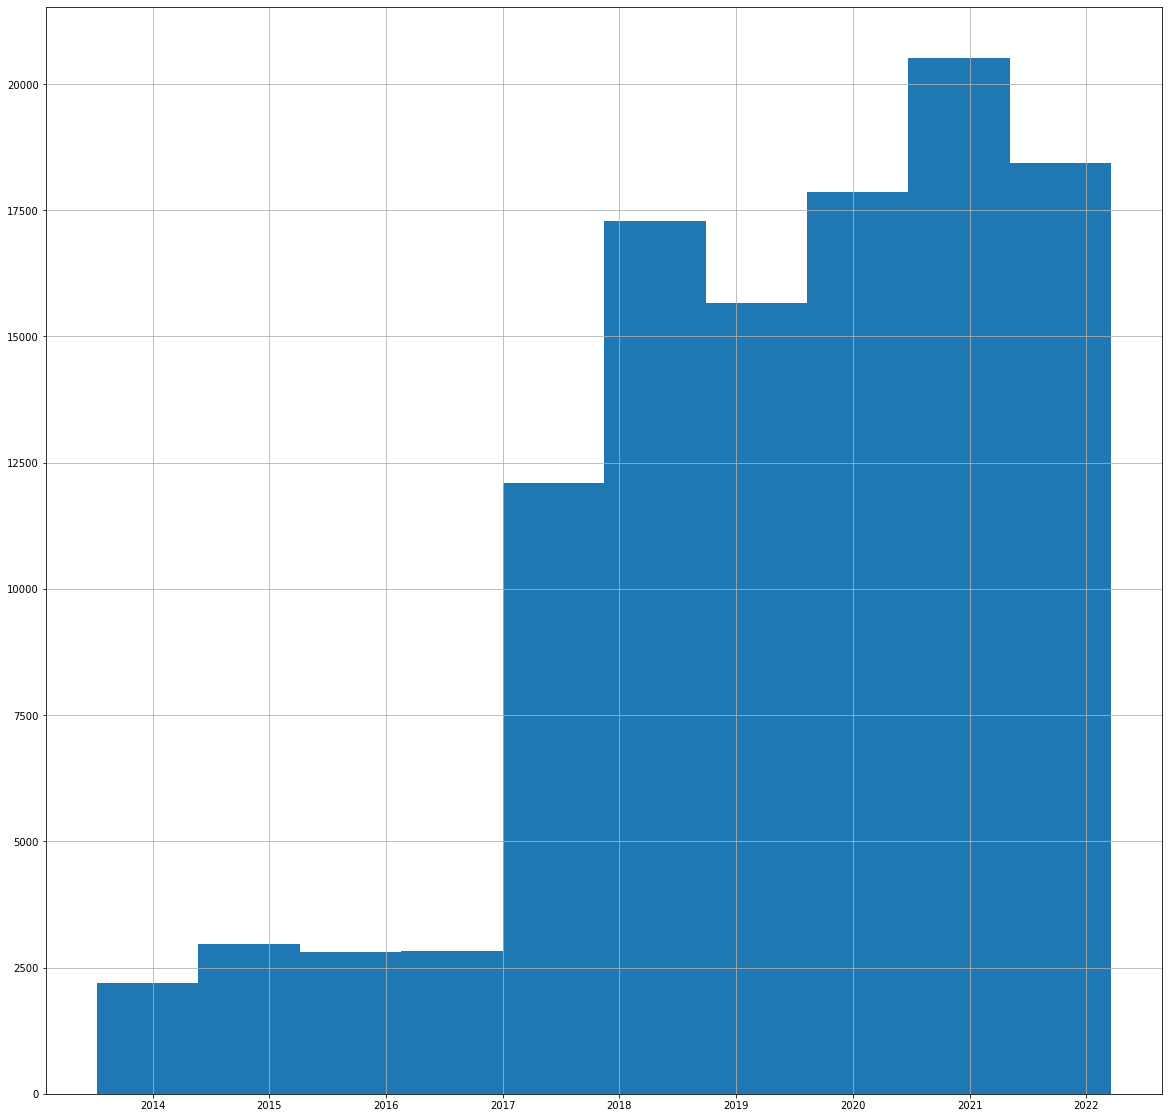

In [765]:
Tags_SM['Date sent to company'].hist(figsize=(20,20))

## Conclusion:

From counting the average days the complaints took to reach the companies for each of the tags `OlderAmerican` and `Servicemember` and `Nan`

we concluded that `ServiceMember` has higher priority than `Older American`

 - `ServiceMember` took 1.33075 day to be sent to the company
 - `Older American`took 2.663 day to be sent to the company
 - `Nan` took 1.1632 day to be sent to the company

# Q2 Which company received a complaint concerning a particular issue more frequently than other companies

Counting the companies

In [815]:
company=complains[['Company','Issue']]

In [831]:
ot = company['Issue'].value_counts()
ot.head()

Incorrect information on your report                                                602160
Problem with a credit reporting company's investigation into an existing problem    283280
Attempts to collect debt not owed                                                   130360
Improper use of your report                                                          99180
Managing an account                                                                  68869
Name: Issue, dtype: int64

In [820]:
op = company['Company'].value_counts()
op.head()

EQUIFAX, INC.                             349651
TRANSUNION INTERMEDIATE HOLDINGS, INC.    263179
Experian Information Solutions Inc.       233454
CAPITAL ONE FINANCIAL CORPORATION          44769
JPMORGAN CHASE & CO.                       38765
Name: Company, dtype: int64

### Here plotting to check which company receives complaints more frequently 


<AxesSubplot:>

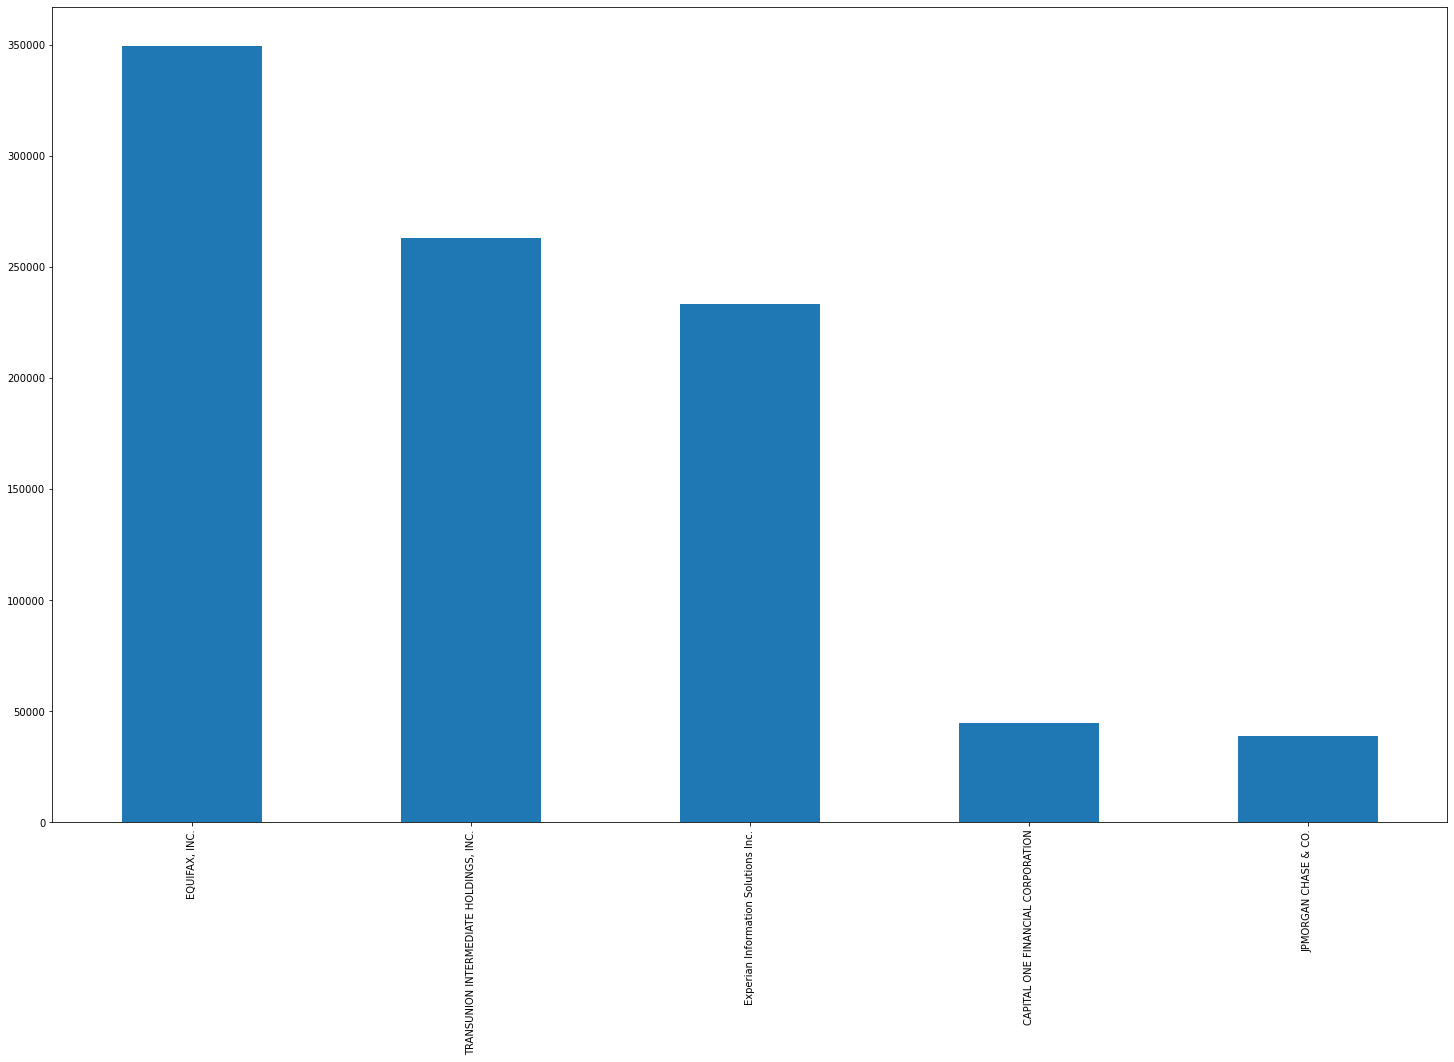

In [821]:
op.head().plot.bar(figsize=(25,15))

### `EQUIFAX, INC.` is the company with the most frequent complaints received

## Here is the plot of the frequent issues 

<AxesSubplot:>

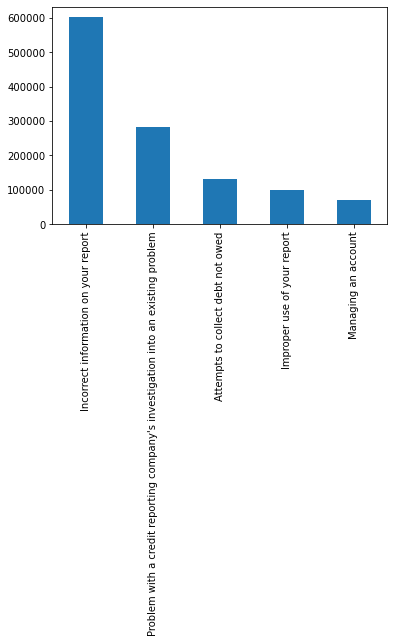

In [841]:
ot.head().plot.bar()

# Conclusion:-
The company `EQUIFAX, INC.` is the compnay that suffers frequently from the issue `Incorrect information on your report`

# ————————————————————————————————————

# Ali 193085

# Q1, what values could the column 'Tags' potentially contain but left blank?


After exploring the dataset , we found that there is a product called 'Student loan' , this product could indicate that the consumer having an issue with this specific product could be a student. 

Also i will create a columm called UnTagged to keep all of the untagged customers inside of it but after im done with the analysis

# We will explore if there is any students in the dataset and see what are the most frequent issues they face.

In [176]:
Students=complains[complains['Product'] == 'Student loan']

Selecting Student loan in the dataset

In [177]:
Students.iloc[:,1:5]

,Product,Sub-product,Issue,Sub-issue
0,Student loan,Private student loan,Struggling to repay your loan,Can't get other flexible options for repaying your loan
66,Student loan,Private student loan,Struggling to repay your loan,Problem lowering your monthly payments
167,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Trouble with how payments are being handled
198,Student loan,Private student loan,Dealing with your lender or servicer,Keep getting calls about your loan
215,Student loan,Federal student loan servicing,Struggling to repay your loan,Can't get other flexible options for repaying your loan
...,...,...,...,...
2550781,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Keep getting calls about your loan
2550783,Student loan,Private student loan,Dealing with your lender or servicer,Problem with customer service
2550823,Student loan,Private student loan,Dealing with your lender or servicer,Trouble with how payments are being handled
2550841,Student loan,Non-federal student loan,Can't repay my loan,Can't decrease my monthly payments


# Adding the tag 'Student' to each consumer who is complaining about an issue concerning a student loan in the dataset

After identifying each one of the above who reported a problem concerning a student loan , we will fill their 'Tag' attribute with the value 'Student' with the following code

In [178]:
Students.loc[Students['Product'] == 'Student loan', 'Tags'] = 'Student'

C:\Users\COMPUMARTS\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


# Let's make sure that out modification is done correctly 

In [163]:
Students.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2019-05-03,Student loan,Private student loan,Struggling to repay your loan,Can't get other flexible options for repaying your loan,NaN,Ameritech Financial,FL,33023,NaN,Consent not provided,Web,2019-05-15,Untimely response,No,3231257
66,2019-03-22,Student loan,Private student loan,Struggling to repay your loan,Problem lowering your monthly payments,NaN,WELLS FARGO & COMPANY,CO,80903,NaN,NaN,Phone,2019-03-28,Closed with monetary relief,Yes,3187899
167,2019-02-25,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Trouble with how payments are being handled,"My loan servicer is Navient. I'm currently enrolled in an income based repayment plan, the status of which should have lasted until XX/XX/2019. I usually file renewal paperwork in the summer. For some reason, the payments due for half of my loans randomly increased in XXXX. The total overall increase is exactly {$100.00}. Last month I was supposed to pay a minimum payment total of XXXX. This month, I supposedly owe XXXX. When I called today ( XX/XX/2019 at XXXX XXXX E. ) to ask why, the customer service representative had no idea what to tell me. She tried to suggest that something may have changed with my private loan. But I was looking at a print out of each individual loan payment, and my private loan was not the issue. Half of my student loans ( 4 direct federal loans and 2 stafford loans ) increased. I've provided screen shots as attachments below. One screen shot from XXXX where my payments were correct. And one from XXXX where they're randomly {$100.00} higher. I'm not sure what the customer service rep was looking at to indicate that this change would have had anything to do with my private loan. But just guessing about it was not helpful and could actually have been harmful to someone who didn't know any better. Her Navient customer service ID was XXXX. We ended the call with her saying she put in a research request to see why the payments would have changed. I requested to speak to a supervisor, but she denied my request. In the meantime, they put my account on a courtesy hold because my payment is due at the end of the month ( in three days ). But no one can explain why my payments increased in the middle of the income based repayment plan cycle This isn't the first time my payments have changed for suspicious reasons. It always seems to get sorted out, but only after a few weeks and many hours on the phone pushing for real answers and not uninformed guesses. I've started taking screenshots of my online navient account because the payments change so frequently and usually in error. And I want to be able to prove what's happening to me.","Navient Solutions, LLC.",NY,11374,NaN,Consent provided,Web,2019-02-25,Closed with explanation,Yes,3162354
198,2022-03-10,Student loan,Private student loan,Dealing with your lender or servicer,Keep getting calls about your loan,NaN,SECURITY CREDIT SYSTEMS INC,MD,21009,NaN,NaN,Web,2022-03-10,Closed with explanation,Yes,5306897
215,2019-03-28,Student loan,Federal student loan servicing,Struggling to repay your loan,Can't get other flexible options for repaying your loan,NaN,"Navient Solutions, LLC.",TX,76244,NaN,NaN,Referral,2019-03-28,Closed with explanation,Yes,3194004


# Q2 What are the most frequent issues and sub-issues the students complain about? and can their narrative potentially imply that there's some cases of scam? 

For this part of the analysis we will split the students into two parts 
   - Students who are complaining about a private student loan
   - Students who are complaining about a federal student loan servicing 

#### What is a private student loan?

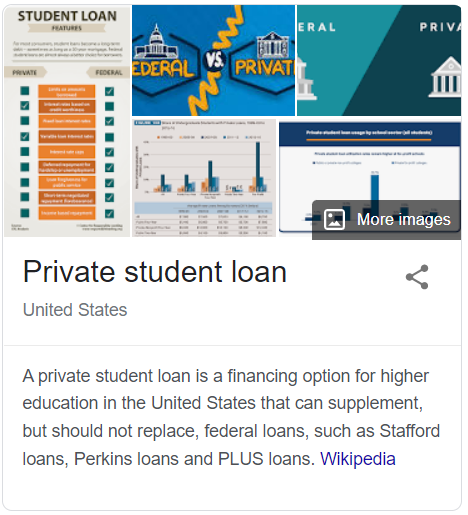

# Let's start with the private student loan

In [296]:
Students_priv = Students[Students['Sub-product']=='Private student loan']
Students_priv.head(3)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2019-05-03,Student loan,Private student loan,Struggling to repay your loan,Can't get other flexible options for repaying your loan,NaN,Ameritech Financial,FL,33023,Student,Consent not provided,Web,2019-05-15,Untimely response,No,3231257
66,2019-03-22,Student loan,Private student loan,Struggling to repay your loan,Problem lowering your monthly payments,NaN,WELLS FARGO & COMPANY,CO,80903,Student,NaN,Phone,2019-03-28,Closed with monetary relief,Yes,3187899
198,2022-03-10,Student loan,Private student loan,Dealing with your lender or servicer,Keep getting calls about your loan,NaN,SECURITY CREDIT SYSTEMS INC,MD,21009,Student,NaN,Web,2022-03-10,Closed with explanation,Yes,5306897


#### Converted the column `Complaint ID` into `String` for plotting purposes

In [240]:
Students_priv['Complaint ID'] = Students_priv['Complaint ID'].apply (str)

C:\Users\COMPUM~1\AppData\Local\Temp/ipykernel_21512/951497523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Students_priv['Complaint ID'] = Students_priv['Complaint ID'].apply (str)


Text(0, 0.5, 'Issues')

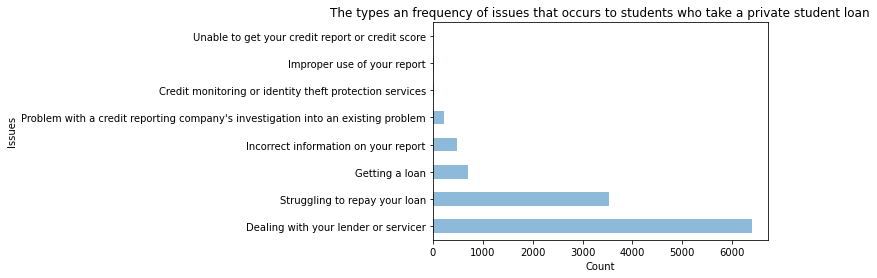

In [282]:
StudentsPriv_cnt = Students_priv['Issue'].value_counts().plot(kind="barh",alpha=0.5)
plt.title('The types an frequency of issues that occurs to students who take a private student loan')
plt.xlabel('Count')
plt.ylabel('Issues') 

## Here we can conclude that the most frequent issue in the private student loan is `Dealing with your lender or servicer`

### Now onto the federal student loan servicing

### What is federal student loan servicing?

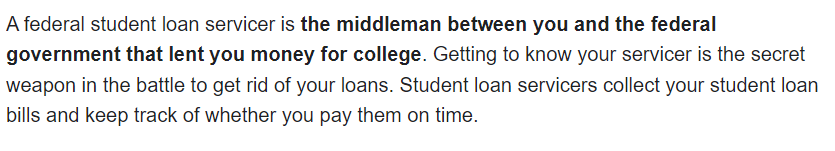

### The word 'midlleman' here raises a flag that there could be too many issues happening.
### Let's find out...

In [299]:
Students_Fed = Students[Students['Sub-product']=='Federal student loan servicing']
Students_Fed.head(3)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
167,2019-02-25,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Trouble with how payments are being handled,"My loan servicer is Navient. I'm currently enrolled in an income based repayment plan, the status of which should have lasted until XX/XX/2019. I usually file renewal paperwork in the summer. For some reason, the payments due for half of my loans randomly increased in XXXX. The total overall increase is exactly {$100.00}. Last month I was supposed to pay a minimum payment total of XXXX. This month, I supposedly owe XXXX. When I called today ( XX/XX/2019 at XXXX XXXX E. ) to ask why, the customer service representative had no idea what to tell me. She tried to suggest that something may have changed with my private loan. But I was looking at a print out of each individual loan payment, and my private loan was not the issue. Half of my student loans ( 4 direct federal loans and 2 stafford loans ) increased. I've provided screen shots as attachments below. One screen shot from XXXX where my payments were correct. And one from XXXX where they're randomly {$100.00} higher. I'm not sure what the customer service rep was looking at to indicate that this change would have had anything to do with my private loan. But just guessing about it was not helpful and could actually have been harmful to someone who didn't know any better. Her Navient customer service ID was XXXX. We ended the call with her saying she put in a research request to see why the payments would have changed. I requested to speak to a supervisor, but she denied my request. In the meantime, they put my account on a courtesy hold because my payment is due at the end of the month ( in three days ). But no one can explain why my payments increased in the middle of the income based repayment plan cycle This isn't the first time my payments have changed for suspicious reasons. It always seems to get sorted out, but only after a few weeks and many hours on the phone pushing for real answers and not uninformed guesses. I've started taking screenshots of my online navient account because the payments change so frequently and usually in error. And I want to be able to prove what's happening to me.","Navient Solutions, LLC.",NY,11374,Student,Consent provided,Web,2019-02-25,Closed with explanation,Yes,3162354
215,2019-03-28,Student loan,Federal student loan servicing,Struggling to repay your loan,Can't get other flexible options for repaying your loan,NaN,"Navient Solutions, LLC.",TX,76244,Student,NaN,Referral,2019-03-28,Closed with explanation,Yes,3194004
256,2019-08-19,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Received bad information about your loan,NaN,"Nelnet, Inc.",OR,97062,Student,NaN,Referral,2019-08-21,Closed with explanation,Yes,3348255


In [298]:
Students_Fed.shape

(31107, 16)

In [235]:
Students_Fed['Complaint ID'] = Students_Fed['Complaint ID'].apply (str)

C:\Users\COMPUM~1\AppData\Local\Temp/ipykernel_21512/2787748757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Students_Fed['Complaint ID'] = Students_Fed['Complaint ID'].apply (str)


Text(0, 0.5, 'Issues')

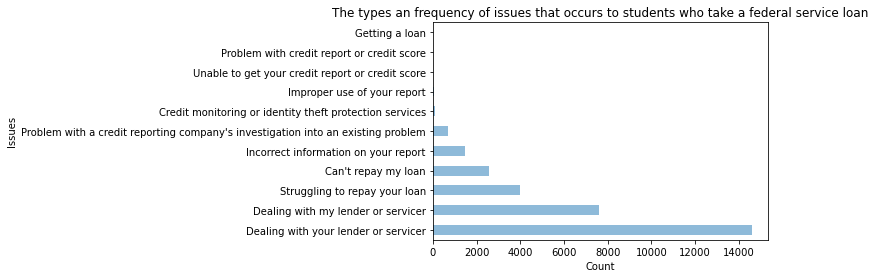

In [280]:
Students_cnt = Students_Fed['Issue'].value_counts(). plot(kind="barh",alpha=0.5)
plt.title('The types an frequency of issues that occurs to students who take a federal service loan')
plt.xlabel('Count')
plt.ylabel('Issues') 

### If we did a side by side comparision between the two types of loan services we can see that private loans service have less number and frequency of issues compared to federal loans service

### This implies that private services have better care and better service than that of federal services 

### But what's common between both is that they suffer more issues when dealing with lender or servicer

### For now i will focus on the federal loan service , considering that it is the service with higher number of issues and higher frequency of complains

i will try and find the most frequent `sub-issue` for the `issue` `'Dealing with your lender or servicer'` and then explore the `Consumer complaint narrative` for each one of them

In [596]:
Sub_ish_fed = Students_Fed.loc[(Students_Fed['Issue'] == 'Dealing with your lender or servicer'),['Issue','Sub-issue','Tags','Consumer complaint narrative']]
Sub_ish_fed.head()

Issue                                    Sub-issue     Tags                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

#### The graph below proves that the most frequent `sub-issue` for the `issue` `Dealing with your lender or servicer` is `Received bad information about your loan` 

Text(0, 0.5, 'Sub-issues')

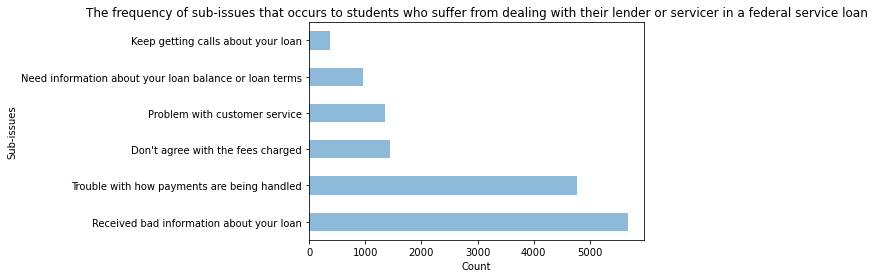

In [640]:
Sub_ish_fed_cnt = Sub_ish_fed['Sub-issue'].value_counts()
plt.plot()
plt.title('The frequency of sub-issues that occurs to students who suffer from dealing with their lender or servicer in a federal service loan')
plt.xlabel('Count')
plt.ylabel('Sub-issues') 

#### Lets see the what they are saying in their narrative 

In [654]:
Sub_ish_fed_narv = Sub_ish_fed.loc[(Sub_ish_fed['Sub-issue'] == 'Received bad information about your loan'),['Consumer complaint narrative']]
Sub_ish_fed_narv.head(50)


Consumer complaint narrative
256                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [659]:
Sub_ish_fed_narv=Sub_ish_fed_narv.dropna()

Dropping the nulls and checking if that is done successfully...

In [660]:
Sub_ish_fed_narv.isna()

,Consumer complaint narrative
585,False
750,False
1045,False
1235,False
1488,False
...,...
2542297,False
2542796,False
2544124,False
2545213,False


# Second part of Q2 , can their narrative potentially imply that there's some cases of scam? 

### First , we will create a list that has all types of words that indicates any types of scam or fraud , the search their occurences in the ``consumer complaint narrative`` 

In [680]:
frd = ['Cover up','Write off','Illegal','Failed investment','Not ethical','Off the books','Backdate','No inspection','Pull earnings forward','Special fees','Friendly payments','fraud','scam','cross','fix','Ponzi scheme','pyramid scheme','racket','rip-off','thimblerig','three-card monte','device','dodge','gimmick' ,'jig' ,'ploy','scheme' ,'sleight' ,'stratagem','trick' ,'wile','gouging' ,'overcharging' ,'soaking','counterfeit' ,'fake' ,'forgery' ,'hoax' ,'humbug' ,'phony','phoney','sham','SCAM','FRAUD','misleading','Misleading','fraud','cheating','CHEATING','embezzlement','imposter']

Here in the above list i typed every word with every form to use it to check for the count of the words in the data set that indicates a fraud or a scam

I will then create a new column called `Word` in this slice of the dataframe that has the splitted form of the column `Consumer complaint narrative`after doing so , i will drop the column `Consumer complaint narrative` and split again the column `Word` and count the occurence of each word inside of it and store the word and its count in seperate columns 

In [671]:
Sub_ish_fed_narv['Word'] = Sub_ish_fed_narv['Consumer complaint narrative'].str.split()
res = Sub_ish_fed_narv.drop('Consumer complaint narrative', 1).explode('Word').groupby(['Word'])['Word'].agg(['count']).reset_index()
print(res)

              Word  count
0                !      2
1               !!      1
2                "   1713
3               ",      2
4               ".      5
...            ...    ...
27890          ~13      1
27891           ~2      1
27892         ~200      1
27893  ~XX/XX/XXXX      1
27894        ~XXXX      1

[27895 rows x 2 columns]


C:\Users\COMPUM~1\AppData\Local\Temp/ipykernel_21512/862481545.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  res = Sub_ish_fed_narv.drop('Consumer complaint narrative', 1).explode('Word').groupby(['Word'])['Word'].agg(['count']).reset_index()


Checking for the validity of the result

In [672]:

print(res)

              Word  count
0                !      2
1               !!      1
2                "   1713
3               ",      2
4               ".      5
...            ...    ...
27890          ~13      1
27891           ~2      1
27892         ~200      1
27893  ~XX/XX/XXXX      1
27894        ~XXXX      1

[27895 rows x 2 columns]


Storing the result in a dataframe

In [673]:
Word = pd.DataFrame(res)

In [674]:
Word.head(60)

,Word,count
0,!,2
1,!!,1
2,"""",1713
3,""",",2
4,""".",5
5,"""Current",2
6,"""HTTP",1
7,"""Nelnet""",2
8,"""Nelnet"".",1
9,"""No",1


Now checking if this dataframe of splitted words contains the words in the list `frd` that i created earlier using `loc()`

In [682]:
Word.loc[Word['Word'].isin(frd)]
    

,Word,count
3703,FRAUD,11
4449,Illegal,1
5074,Misleading,4
6463,SCAM,4
10775,cheating,3
12055,cross,2
12743,device,3
13677,embezzlement,1
14462,fake,16
14775,fix,134


### As seen above , the words releated to fraud and scam occurred more than usual in the data frame 

### The point im trying to prove is that a bulk of this particular sub-issue may occured because of scam or fraud 

### Off topic findings :

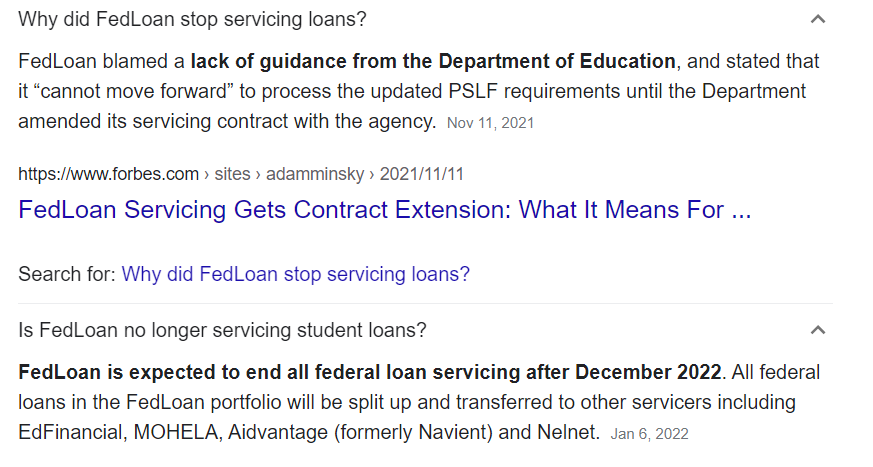

## It seems that this type of service has some major problems other than scam and fraud

Source: https://www.nitrocollege.com/student-loan-servicers/fedloan-servicing-legit

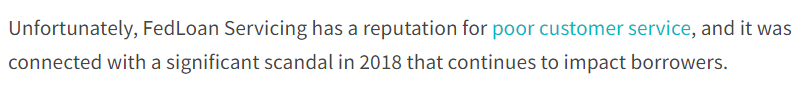

# -------------------------------------------------------------------------------------------------------------



<h1><center> Phase 2</center></h1>
                                                

# Ziad Mostafa 201541

## Does the Type of zip codes affect the responce time or no?


### Scraped data will show the two types of Zip codes ('Non-unique','PO Box'), 'non-unique' is the standard while   (PO BOX) can provide you with your secure way to receive mail, especially if you don’t want to provide detailed information about your physical address for a variety of different reasons and then check the time it took to respond to the PO Box and if it's replied faster or not ?

In [36]:
# Here we request the Url to give accesses to web page

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
url='https://www.zipdatamaps.com/list-of-zip-codes-in-florida.php'
FL = requests.get(url,headers=headers)

In [37]:
# Getting the text from the web page and use BeautifulSoup4 to analysis it
FL_text = FL.text
FL_page = BeautifulSoup(FL_text,'html.parser')

In [38]:
# Showing my start position 5000 element in the text where data begins to appear 
FL_page.prettify()[5000:15000]

'    <a href="lafayette-fl-county-zipcodes">\n         Lafayette\n        </a>\n       </td>\n      </tr>\n      <tr>\n       <td>\n        <a href="32009">\n         32009\n        </a>\n       </td>\n       <td>\n        Non-Unique\n       </td>\n       <td>\n        <a href="zipcodes-bryceville-fl">\n         Bryceville\n        </a>\n       </td>\n       <td>\n        <a href="nassau-fl-county-zipcodes">\n         Nassau\n        </a>\n       </td>\n      </tr>\n      <tr>\n       <td>\n        <a href="32011">\n         32011\n        </a>\n       </td>\n       <td>\n        Non-Unique\n       </td>\n       <td>\n        <a href="zipcodes-callahan-fl">\n         Callahan\n        </a>\n       </td>\n       <td>\n        <a href="nassau-fl-county-zipcodes">\n         Nassau\n        </a>\n       </td>\n      </tr>\n      <tr>\n       <td>\n        <a href="32013">\n         32013\n        </a>\n       </td>\n       <td>\n        Non-Unique\n       </td>\n       <td>\n        <a hre

In [39]:
len(FL_page.find('table'))

1479

In [40]:
# We found that the required table with this class name "table table-striped table-bordered table-hover table-condensed"
class_='table table-striped table-bordered table-hover table-condensed'
table = FL_page.find('table',attrs={'class':class_})
table

<table class="table table-striped table-bordered table-hover table-condensed"><thead><th>Zip Code</th><th>Zip Code Type</th><th>Zip Code Name</th><th>County</th></thead><tr><td><a href="32003">32003</a></td><td>Non-Unique</td><td><a href="zipcodes-fleming-island-fl">Fleming Island</a></td><td><a href="clay-fl-county-zipcodes">Clay</a></td></tr><tr><td><a href="32004">32004</a></td><td>PO Box</td><td><a href="zipcodes-ponte-vedra-beach-fl">Ponte Vedra Beach</a></td><td><a href="saint-johns-fl-county-zipcodes">Saint Johns</a></td></tr><tr><td><a href="32006">32006</a></td><td>PO Box</td><td><a href="zipcodes-fleming-island-fl">Fleming Island</a></td><td><a href="clay-fl-county-zipcodes">Clay</a></td></tr><tr><td><a href="32007">32007</a></td><td>PO Box</td><td><a href="zipcodes-bostwick-fl">Bostwick</a></td><td><a href="putnam-fl-county-zipcodes">Putnam</a></td></tr><tr><td><a href="32008">32008</a></td><td>Non-Unique</td><td><a href="zipcodes-branford-fl">Branford</a></td><td><a href="l

In [41]:
type(table)

bs4.element.Tag

In [42]:
# Printing the table headers to convert the table to pandas dataframe
table.find_all('th')

[<th>Zip Code</th>,
 <th>Zip Code Type</th>,
 <th>Zip Code Name</th>,
 <th>County</th>]

In [43]:
# create the list to seperate data into it
Zip_Code = []
Zip_Code_Type = []
Zip_Code_Name = []
County = []

rows = table.find_all('tr')
rows[:3]

[<tr><td><a href="32003">32003</a></td><td>Non-Unique</td><td><a href="zipcodes-fleming-island-fl">Fleming Island</a></td><td><a href="clay-fl-county-zipcodes">Clay</a></td></tr>,
 <tr><td><a href="32004">32004</a></td><td>PO Box</td><td><a href="zipcodes-ponte-vedra-beach-fl">Ponte Vedra Beach</a></td><td><a href="saint-johns-fl-county-zipcodes">Saint Johns</a></td></tr>,
 <tr><td><a href="32006">32006</a></td><td>PO Box</td><td><a href="zipcodes-fleming-island-fl">Fleming Island</a></td><td><a href="clay-fl-county-zipcodes">Clay</a></td></tr>]

In [44]:
i = 0 
for row in rows:
    if i == 0: # skip the header
        i += 1
        continue
    cols = row.find_all('td')
    print(cols)
    break

[<td><a href="32004">32004</a></td>, <td>PO Box</td>, <td><a href="zipcodes-ponte-vedra-beach-fl">Ponte Vedra Beach</a></td>, <td><a href="saint-johns-fl-county-zipcodes">Saint Johns</a></td>]


In [46]:
i = 0 
for row in rows:
    if i == 0: # skip the header
        i += 1
        continue
    cols = row.find_all('td')
    Zip_Code.append(cols[0].text)
    Zip_Code_Type.append(cols[1].text)
    Zip_Code_Name.append(cols[2].text)
    County.append(cols[3].text)
    break

len(Zip_Code), len(Zip_Code_Type), len(Zip_Code_Name), len(County)

(21, 20, 20, 20)

In [47]:
# here i pop index 0 because it's readed and added before the actual read of the files so i pop the values 0 .
Zip_Code.pop(0)

'32004'

In [48]:
# create a dataframe
FLDataFrame = pd.DataFrame({'ZIP code':Zip_Code,'Type':Zip_Code_Type,'Name':Zip_Code_Name,'County':County})
FLDataFrame.head(20)

,ZIP code,Type,Name,County
0,32006,PO Box,Ponte Vedra Beach,Saint Johns
1,32007,PO Box,Fleming Island,Clay
2,32008,PO Box,Bostwick,Putnam
3,32009,Non-Unique,Branford,Lafayette
4,32011,Non-Unique,Bryceville,Nassau
5,32013,Non-Unique,Callahan,Nassau
6,32024,Non-Unique,Day,Lafayette
7,32025,Non-Unique,Lake City,Columbia
8,32026,Non-Unique,Lake City,Columbia
9,32030,Unique,Raiford,Bradford


In [49]:
# Dropping the index because the value of the ZIP code is damaged 
FLDataFrame = FLDataFrame.drop(index=18)

In [50]:
FLDataFrame.head(20)

,ZIP code,Type,Name,County
0,32006,PO Box,Ponte Vedra Beach,Saint Johns
1,32007,PO Box,Fleming Island,Clay
2,32008,PO Box,Bostwick,Putnam
3,32009,Non-Unique,Branford,Lafayette
4,32011,Non-Unique,Bryceville,Nassau
5,32013,Non-Unique,Callahan,Nassau
6,32024,Non-Unique,Day,Lafayette
7,32025,Non-Unique,Lake City,Columbia
8,32026,Non-Unique,Lake City,Columbia
9,32030,Unique,Raiford,Bradford


In [51]:
FLDataFrame.isnull().sum()

ZIP code    0
Type        0
Name        0
County      0
dtype: int64

In [52]:
FLDataFrame['ZIP code']=FLDataFrame['ZIP code'].astype(int)

In [61]:
# Here we copy the dataframe of the complains that shows the state florida specifically its zip codes
Frame1 = s1.copy()
Frame1.tail(20)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
1048173,2021-03-25,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Problem with a credit reporting company's investigation into an existing problem,Their investigation did not fix an error on your report,I called Equifax and I was informed to send my id social and bill. I sent them everything. They have inquiries that do not belong to me. I provided them police report and I was told it would take 72 hours for the items to be removed. They are still there after months of me speaking with them.,"EQUIFAX, INC.",FL,33313,NaN,Consent provided,Web,2021-03-25,Closed with explanation,Yes,4245291
1048175,2020-03-30,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,"Please investigate and remove these accounts from my credit report or I will have to refer the matter to my attorney and take immediate legal action against you. The constant judgments awarded against you certainly demonstrate that courts are will not tolerate your bullying tactics.I have made a lawful request of you to verify a report about me in my credit files. \n\nI respectfully suggest that you complete your investigation within the time period allotted to you by law, and in the event that you are able to verify this report that you supply me with the name, company address and company phone number of the person having verified the report and a full and complete report on the method you used to perform your investigation as dictated in the Fair Credit Reporting Act. \n\nXXXX/XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX Those accounts are not belong to me or any transactions made by me. \nPlease remove as soon as possible.","TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,34984,NaN,Consent provided,Web,2020-03-30,Closed with explanation,Yes,3585728
1048200,2017-01-19,Student loan,Non-federal student loan,Dealing with my lender or servicer,Received bad information about my loan,NaN,"Navient Solutions, LLC.",FL,32117,NaN,Consent not provided,Web,2017-01-19,Closed with explanation,Yes,2296144
1048233,2021-03-01,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,"EQUIFAX, INC.",FL,33169,NaN,Other,Web,2021-03-01,Closed with explanation,Yes,4173214
1048256,2021-03-26,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute about a purchase on your statement,"on XX/XX/2020, I hired a moving company to move my things from my about to close home to storage. I was advertised several things, including that paying extra for more movers would save me time, and so would also be cheaper. So I paid for 2 extra movers. The first issue was the truck needed for the move wasn't available, so they came with one too small. The second issue was of the extra movers, at least one of them was their very first day at the job, and wasted a lot of time learning what to do. In short, this is the second time I used these movers but the move took more time, and costed more to go to a storage facility XXXX miles away, than my multi city move with the same company which was over XXXX miles, and half the amount of movers. It was late, I had to close the home and return the keys to the real estate agent, so at the end I had other things to worry about and paid. \n\nNaturally I tried to discuss this with the company, and the same manager who promised me all this cost savings and efficiency refused to make amends, trying to sell me a discount on my next move instead of fixing my current move. At one 

In [62]:
# Here we copy the scraped dataframe
Frame2 = FLDataFrame.copy()
Frame2.tail(54)

,ZIP code,Type,Name,County
0,32006,PO Box,Ponte Vedra Beach,Saint Johns
1,32007,PO Box,Fleming Island,Clay
2,32008,PO Box,Bostwick,Putnam
3,32009,Non-Unique,Branford,Lafayette
4,32011,Non-Unique,Bryceville,Nassau
5,32013,Non-Unique,Callahan,Nassau
6,32024,Non-Unique,Day,Lafayette
7,32025,Non-Unique,Lake City,Columbia
8,32026,Non-Unique,Lake City,Columbia
9,32030,Unique,Raiford,Bradford


In [60]:
# Here we merge between the two frames that we copied dataframes from to make one dataframe.

Frame3 = pd.merge(Frame1, Frame2, on = 'ZIP code',how='inner')
Frame3.head(20)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Type,Name,County
0,2019-03-14,Debt collection,Other debt,Written notification about debt,Didn't receive notice of right to dispute,NaN,Southern Management Systems Inc.,FL,32040,NaN,Consent not provided,Web,2019-03-14,Closed with explanation,Yes,3179359,Non-Unique,Fort White,Columbia
1,2019-03-14,Debt collection,Medical debt,Attempts to collect debt not owed,Debt was paid,NaN,"CMRE Financial Services, Inc.",FL,32040,NaN,Consent not provided,Web,2019-03-14,Closed with explanation,Yes,3180086,Non-Unique,Fort White,Columbia
2,2022-02-18,Credit card or prepaid card,General-purpose credit card or charge card,Trouble using your card,Account sold or transferred to another company,NaN,"Block, Inc.",FL,32040,NaN,NaN,Web,2022-02-18,Closed with explanation,Yes,5236938,Non-Unique,Fort White,Columbia
3,2015-06-01,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt was paid,NaN,"Sherloq Group, Inc",FL,32040,NaN,Consent not provided,Web,2015-06-03,Closed with explanation,Yes,1399718,Non-Unique,Fort White,Columbia
4,2019-03-14,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was paid,NaN,WELLS FARGO & COMPANY,FL,32040,NaN,Consent not provided,Web,2019-03-14,Closed with explanation,Yes,3179236,Non-Unique,Fort White,Columbia
5,2019-10-17,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Trouble with how payments are being handled,NaN,"Navient Solutions, LLC.",FL,32040,NaN,NaN,Postal mail,2019-10-17,Closed with explanation,Yes,3409216,Non-Unique,Fort White,Columbia
6,2021-12-15,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Account status incorrect,"I had a balance due to Upgrade , Inc. when I filed for personal bankrupcty protection on XX/XX/XXXX ( XXXX XXXX ). My debt to Upgrade Inc. was discharged when my bankruptcy was discharged, and my other creditors began correctly reporting the status of my accounts to all 3 major credit bureaus. Upgrade was so slow to change the reporting, that I had to dispute the debt with the credit bureaus and Upgrade , Inc, to have it changed to the appropriate status of discharged in bankruptcy and {$0.00} balance. Throughout XXXX, however, Upgrade Inc has changed the reporting of my closed account several times with the different credit bureaus without provocation or reason. I disputed the changed reporting ( status, amount, etc, were even reported differently at different times by Upgrade , Inc ). In XXXX and XXXX, XXXX, they began reporting to 2 of the 3 credit bureaus a total amount that is far more than I ever owed, and showing part of it charged off and part of it still owed and very late. They also added derogatory history back to XXXX, as well. I have attempted to contact Upgrade Inc, but there is no one I can talk to that handles credit bureau reporting at that company, and when I dispute with the credit bureaus, the company seems to retaliate by adding additional derogatory info. I need help getting Upgrade Inc to correctly report by discharged debt to all 3 credit bureaus before it hurts me financially and in my career.","Upgrade, Inc.",FL,32040,NaN,Consent provided,Web,2021-12-15,Closed with explanation,Yes,5012540,Non-Unique,Fort White,Columbia
7,2015-08-24,Debt collection,Medical,Communication tactics,Called after sent written cease of comm,NaN,"I.C. System, Inc.",FL,32040,NaN,Consent not provided,Web,2015-08-24,Closed with explanation,Yes,1532455,Non-Unique,Fort White,Columbia
8,2019-07-02,"Credit reporting, credit repair services, or other personal consumer reports",Credit reporting,Incorrect information on your report,Account status incorrect,I have submitted disputes through credit karma directly to XXXX and XXXX for th

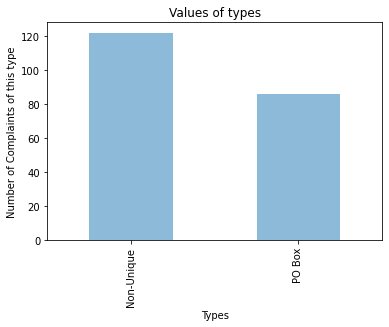

In [56]:
Frame3.Type.value_counts().plot(kind="bar",alpha=0.5)
plt.title('Values of types')
plt.xlabel('Types')
plt.ylabel('Number of Complaints of this type') 
plt.show()

<AxesSubplot:>

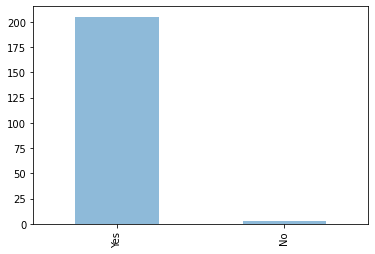

In [57]:
Frame3['Timely response?'].value_counts().plot(kind="bar",alpha=0.5)

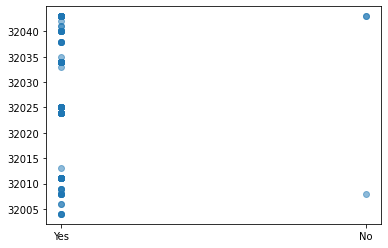

In [58]:
plt.scatter(Frame3['Timely response?'],Frame3['ZIP code'], alpha=0.5)

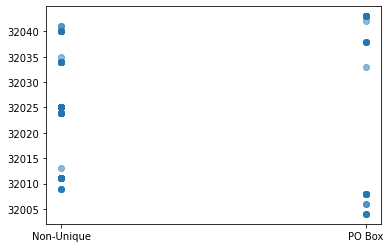

In [59]:
plt.scatter(Frame3['Type'],Frame3['ZIP code'], alpha=0.5)

Here we can see that the Responce time for the PO Box is Lower than the reponse time for NO-Unique type which can be a downgrading for the people that pays (although it's not expensive) but their is absolutly no preference so the managing of companies should consider this.

# Ali Mahran  193085

# What is the most frequent problem and its cause when it comes to debt collection , and does it have any relation with the state in any way?

We will need first to filter our data to only display complains that is associated with debts

In [19]:
test = complains[complains['Issue'].str.contains('debt')]
test.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
5,2022-03-20,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,NaN,"EQUIFAX, INC.",FL,33311,NaN,NaN,Web,2022-03-20,Closed with explanation,Yes,5344450
36,2019-03-26,Debt collection,Other debt,Written notification about debt,Didn't receive enough information to verify debt,NaN,"I.C. System, Inc.",OH,44663,Servicemember,Consent not provided,Web,2019-04-01,Closed with explanation,Yes,3191612
46,2022-02-01,Debt collection,I do not know,Attempts to collect debt not owed,Debt was result of identity theft,NaN,Rent Recovery Solutions,NV,89169,NaN,NaN,Web,2022-02-01,Closed with explanation,Yes,5174984
49,2022-03-09,Debt collection,I do not know,Attempts to collect debt not owed,Debt was result of identity theft,"am XXXX XXXX and I am submitting this myself with no third party involved. I NEVER SIGNED AN AGREEMENT WITH THIS CREDITOR THIS IS NOT THE ORIGINAL CREDITOR. I WAS NEVER 30 DAYS LATE. THESE ARE DUPLICATE ACCOUNTS. 15 U.S. Code 1692e. False or misleading representations A debt collector may not use any false, deceptive, or misleading representation or means in connection with the collection of any debt. Without limiting the general application of the foregoing, the following conduct is a violation of this section : ( 1 ) The false representation or implication that the debt collector is vouched for, bonded by, or affiliated with the United States or any State, including the use of any badge, uniform, or facsimile thereof. ( 2 ) The false representation of ( A ) the character, amount, or legal status of any debt; or ( B ) any services rendered or compensation which may be lawfully received by any debt collector for the collection of a debt. ( 3 ) The false representation or implication that any individual is an attorney or that any communication is from an attorney. ( 4 ) The representation or implication that nonpayment of any debt will result in the arrest or imprisonment of any person or the seizure, garnishment, attachment, or sale of any property or wages of any person unless such action is lawful and the debt collector or creditor intends to take such action. ( 5 ) The threat to take any action that can not legally be taken or that is not intended to be taken. ( 6 ) The false representation or implication that a sale, referral, or other transfer of any interest in a debt shall cause the consumer to ( A ) lose any claim or defense to payment of the debt; or ( B ) become subject to any practice prohibited by this subchapter. ( 7 ) The false representation or implication that the consumer committed any crime or other conduct in order to disgrace the consumer. ( 8 ) Communicating or threatening to communicate to any person credit information which is known or which should be known to be false, including the failure to communicate that a disputed debt is disputed. ( 9 ) The use or distribution of any written communication which simulates or is falsely represented to be a document authorized, issued, or approved by any court, official, or agency of the United States or any State, or which creates a false impression as to its source, authorization, or approval. ( 10 ) The use of any false representation or deceptive means to collect or attempt to collect any debt or to obtain information concerning a consumer. ( 11 ) The failure to disclose in the initial written communication with the consumer and, in addition, if the initial communication with the consumer is oral, in that initial oral communication, that the debt collector is attempting to collect a debt and that any information obtained will be used for that purpose, and the failure to disclose in subsequent communications that the communication is from a debt collector, except that this paragraph shall not apply to a for

  
  
<h1><center>Data scraping & Integeration </center></h1>
    
<ol>
    
For the integeration part i scraped a table that contains all the state names in the `USA` and its abbreviations
</ol>
<br>

#### Note: some regions were not mentioned because they are not treated as states . some had to be dropped as we will see later in the analysis and some were manually inserted 

#  
# What is the purpose of this step?
##  
 
The column `State` contains the state name for the consumer that filed a complaint , but the problem is the state name is in an abbreviation form which makes the column's data incomprehensible 


<h1><center>Retriving the tables</center></h1>


In [19]:
States_Table = pd.read_html('https://www.faa.gov/air_traffic/publications/atpubs/cnt_html/appendix_a.html')

States = States_Table[0]
States.head()

,STATE(TERRITORY),STATE(TERRITORY).1,STATE(TERRITORY).2,STATE(TERRITORY).3,STATE(TERRITORY).4,STATE(TERRITORY).5
0,Alabama,AL,Kentucky,KY,Ohio,OH
1,Alaska,AK,Louisiana,LA,Oklahoma,OK
2,Arizona,AZ,Maine,ME,Oregon,OR
3,Arkansas,AR,Maryland,MD,Pennsylvania,PA
4,American Samoa,AS,Massachusetts,MA,Puerto Rico,PR


## Exploration of the data

In [20]:
print(States)

        STATE(TERRITORY) STATE(TERRITORY).1        STATE(TERRITORY).2  \
0                Alabama                 AL                  Kentucky   
1                 Alaska                 AK                 Louisiana   
2                Arizona                 AZ                     Maine   
3               Arkansas                 AR                  Maryland   
4         American Samoa                 AS             Massachusetts   
5             California                 CA                  Michigan   
6               Colorado                 CO                 Minnesota   
7            Connecticut                 CT               Mississippi   
8               Delaware                 DE                  Missouri   
9   District of Columbia                 DC                   Montana   
10               Florida                 FL                  Nebraska   
11               Georgia                 GA                    Nevada   
12                  Guam                 GU        


<h1><center>Data segmentation </center></h1>

The data shown above is not well aligned, so i took the approach of segmenting it so it can be later converted to a `dict` for mapping them to the original dataset i will be working on

In [21]:
States1 = States.loc[:,['STATE(TERRITORY)','STATE(TERRITORY).1']]
States2=States.loc[:,['STATE(TERRITORY).2','STATE(TERRITORY).3']]
States3=States.loc[:,['STATE(TERRITORY).4','STATE(TERRITORY).5']]
States1.index = States1['STATE(TERRITORY).1']
States2.index = States2['STATE(TERRITORY).3']
States3.index = States3['STATE(TERRITORY).5']
del States1["STATE(TERRITORY).1"]
del States2["STATE(TERRITORY).3"]
del States3["STATE(TERRITORY).5"]

Segmenting the first part....


In [22]:
S1 = States1.to_dict()
S1

{'STATE(TERRITORY)': {'AL': 'Alabama',
  'AK': 'Alaska',
  'AZ': 'Arizona',
  'AR': 'Arkansas',
  'AS': 'American Samoa',
  'CA': 'California',
  'CO': 'Colorado',
  'CT': 'Connecticut',
  'DE': 'Delaware',
  'DC': 'District of Columbia',
  'FL': 'Florida',
  'GA': 'Georgia',
  'GU': 'Guam',
  'HI': 'Hawaii',
  'ID': 'Idaho',
  'IL': 'Illinois',
  'IN': 'Indiana',
  'IA': 'Iowa',
  'KS': 'Kansas'}}

Segmenting the second part....

In [25]:
S2 = States2.to_dict()
S2

{'STATE(TERRITORY).2': {'KY': 'Kentucky',
  'LA': 'Louisiana',
  'ME': 'Maine',
  'MD': 'Maryland',
  'MA': 'Massachusetts',
  'MI': 'Michigan',
  'MN': 'Minnesota',
  'MS': 'Mississippi',
  'MO': 'Missouri',
  'MT': 'Montana',
  'NE': 'Nebraska',
  'NV': 'Nevada',
  'NH': 'New Hampshire',
  'NJ': 'New Jersey',
  'NM': 'New Mexico',
  'NY': 'New York',
  'NC': 'North Carolina',
  'ND': 'North Dakota',
  'CM': 'Northern Mariana Islands'}}

And the third part....

In [26]:
S3 = States3.to_dict()
S3

{'STATE(TERRITORY).4': {'OH': 'Ohio',
  'OK': 'Oklahoma',
  'OR': 'Oregon',
  'PA': 'Pennsylvania',
  'PR': 'Puerto Rico',
  'RI': 'Rhode Island',
  'SC': 'South Carolina',
  'SD': 'South Dakota',
  'TN': 'Tennessee',
  'TX': 'Texas',
  'TT': 'Trust Territories',
  'UT': 'Utah',
  'VT': 'Vermont',
  'VA': 'Virginia',
  'VI': 'Virgin Islands',
  'WA': 'Washington',
  'WV': 'West Virginia',
  'WI': 'Wisconsin',
  'WY': 'Wyoming'}}

###### Then a for-loop is created that takes the 3 dictionaries above and stores them in a dictionary call `States_Dict` which will later be used to map the names of the states to its abbreviations

In [27]:
States_Dict={}
for key, value in S1.items():
    dictt=value
    for key , value in dictt.items():
        States_Dict[key]=dictt[key]
for key, value in S2.items():
    dictt=value
    for key , value in dictt.items():
        States_Dict[key]=dictt[key]
for key, value in S3.items():
    dictt=value
    for key , value in dictt.items():
        States_Dict[key]=dictt[key]


In [28]:
States_Dict

{'AL': 'Alabama',
 'AK': 'Alaska',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'DC': 'District of Columbia',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'CM': 'Northern Mariana Islands',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'TT': 'Trust Territories',
 'UT': 

This is the part where i faced the problem of the regions that does not count as a state , but they had to be included so i manually inserted them into the dictionary

In [29]:
States_Dict['AP']='Armed Forces Pacific'
States_Dict['FM'] = 'Federated States of Micronesia'
States_Dict['UNITED STATES MINOR OUTLYING ISLANDS'] = 'United States Minor Outlying Islands'
States_Dict['MH']='Marshall Islands'
States_Dict['MP']='Northern Mariana Islands'
States_Dict['AA']='Armed Forces Americas (except Canada)'

In [30]:
print(len(States_Dict.keys()))

63


Finally, mapping the values of the dictionary to the `State` column , the `map.()` function will check the state names in the `State` column , if the key of the `State_Dict` which is the two-letters abbreviation matches the value in the `State` column, it will put the corresponding value in the new column `States` infront of it 

In [36]:
test["States"]=test["State"].map(States_Dict)
test

C:\Users\COMPUM~1\AppData\Local\Temp/ipykernel_21040/3364010264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["States"]=test["State"].map(States_Dict)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,States
5,2022-03-20,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,NaN,"EQUIFAX, INC.",FL,33311,NaN,NaN,Web,2022-03-20,Closed with explanation,Yes,5344450,Florida
36,2019-03-26,Debt collection,Other debt,Written notification about debt,Didn't receive enough information to verify debt,NaN,"I.C. System, Inc.",OH,44663,Servicemember,Consent not provided,Web,2019-04-01,Closed with explanation,Yes,3191612,Ohio
46,2022-02-01,Debt collection,I do not know,Attempts to collect debt not owed,Debt was result of identity theft,NaN,Rent Recovery Solutions,NV,89169,NaN,NaN,Web,2022-02-01,Closed with explanation,Yes,5174984,Nevada
49,2022-03-09,Debt collection,I do not know,Attempts to collect debt not owed,Debt was result of identity theft,am XXXX XXXX and I am submitting this myself w...,"CCS Financial Services, Inc.",GA,30291,NaN,Consent provided,Web,2022-03-09,Closed with explanation,Yes,5299065,Georgia
54,2022-02-02,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,NaN,Rent Recovery Solutions,AK,99669,NaN,NaN,Web,2022-02-02,Closed with explanation,Yes,5179564,Alaska
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550808,2018-11-13,Debt collection,Private student loan debt,Attempts to collect debt not owed,Debt is not yours,NaN,"EQUIFAX, INC.",NY,11237,NaN,Consent not provided,Web,2018-11-13,Closed with non-monetary relief,Yes,3072237,New York
2550817,2018-11-17,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,"EQUIFAX, INC.",TX,77044,NaN,Other,Web,2018-11-17,Closed with explanation,Yes,3077919,Texas
2550819,2019-02-20,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,"Today, XX/XX/2019, I received a call from Sout...","Southwest Credit Systems, L.P.",TX,78251,NaN,Consent provided,Web,2019-02-20,Closed with explanation,Yes,3156700,Texas
2550836,2017-03-04,Debt collection,I do not know,Disclosure verification of debt,Not given enough info to verify debt,I have received calls and notices in regards t...,"Arnold Scott Harris, P.C.",IL,60651,NaN,Consent provided,Web,2017-03-04,Closed with explanation,Yes,2371856,Illinois


### Dropping the `AE` region
####  
I dropped it because the abbreviation `AE` could stand for three different regions in the USA.
Also consider that there is no evidence in the data that indicates which one of the 3 regions the consumer with the state `AE` lives in

In [37]:
test.drop(test.loc[test['State']=='AE'].index, inplace=True)

C:\Users\COMPUMARTS\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Checking for nulls...

In [38]:
test[test["States"].isna()]

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,States


The next two cells are just deleteing the old `State` column and replace it with the new `States` column

In [39]:
first_column = test.pop('States')
test.insert(7, 'States', first_column)

In [40]:
del test['State']


Perfect!!!

In [41]:
test

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company,States,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
5,2022-03-20,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,NaN,"EQUIFAX, INC.",Florida,33311,NaN,NaN,Web,2022-03-20,Closed with explanation,Yes,5344450
36,2019-03-26,Debt collection,Other debt,Written notification about debt,Didn't receive enough information to verify debt,NaN,"I.C. System, Inc.",Ohio,44663,Servicemember,Consent not provided,Web,2019-04-01,Closed with explanation,Yes,3191612
46,2022-02-01,Debt collection,I do not know,Attempts to collect debt not owed,Debt was result of identity theft,NaN,Rent Recovery Solutions,Nevada,89169,NaN,NaN,Web,2022-02-01,Closed with explanation,Yes,5174984
49,2022-03-09,Debt collection,I do not know,Attempts to collect debt not owed,Debt was result of identity theft,am XXXX XXXX and I am submitting this myself w...,"CCS Financial Services, Inc.",Georgia,30291,NaN,Consent provided,Web,2022-03-09,Closed with explanation,Yes,5299065
54,2022-02-02,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,NaN,Rent Recovery Solutions,Alaska,99669,NaN,NaN,Web,2022-02-02,Closed with explanation,Yes,5179564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550808,2018-11-13,Debt collection,Private student loan debt,Attempts to collect debt not owed,Debt is not yours,NaN,"EQUIFAX, INC.",New York,11237,NaN,Consent not provided,Web,2018-11-13,Closed with non-monetary relief,Yes,3072237
2550817,2018-11-17,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,"EQUIFAX, INC.",Texas,77044,NaN,Other,Web,2018-11-17,Closed with explanation,Yes,3077919
2550819,2019-02-20,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,"Today, XX/XX/2019, I received a call from Sout...","Southwest Credit Systems, L.P.",Texas,78251,NaN,Consent provided,Web,2019-02-20,Closed with explanation,Yes,3156700
2550836,2017-03-04,Debt collection,I do not know,Disclosure verification of debt,Not given enough info to verify debt,I have received calls and notices in regards t...,"Arnold Scott Harris, P.C.",Illinois,60651,NaN,Consent provided,Web,2017-03-04,Closed with explanation,Yes,2371856


After the data preperation is done . We need to know what is the most frequent problem and its cause when it comes to debt collection , and does it have any relation with the state in any way?

#### To answer such question we must ask another question which is:


<h1><center>Which issue related to debt collection is ubiquitous? and what are the reason/s behind it?which state suffers the most from this issue? </center></h1>


### Step 1 : Identifying the different types of issues concerning debt collection

In [36]:
get_unique = test["Issue"].unique()

In [37]:
pd.DataFrame(get_unique)

,0
0,Attempts to collect debt not owed
1,Written notification about debt
2,Cont'd attempts collect debt not owed
3,Disclosure verification of debt


### Step 2 : get the count of the occurence of these issues and visualize them

<AxesSubplot:ylabel='Issue'>

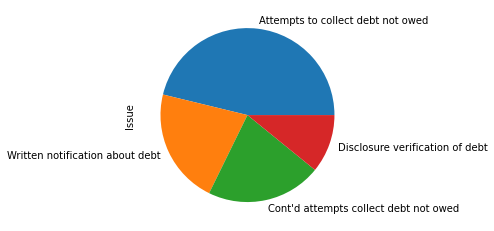

In [38]:
test["Issue"].value_counts().plot(kind='pie')

It seems that the most frequent issue in debt collection is `Attempts to collect debt not owned` and `Cont'd attempts to collect debt not owned` which technically both are the same issues

But what does it mean?

According to `thebalance.com` 
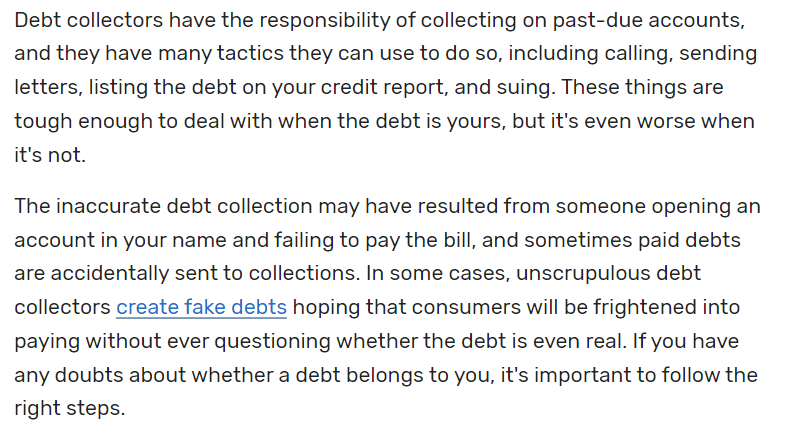


<h1><center>Querying the issue</center></h1>


In [150]:
dbt = test[test["Issue"].str.contains("to collect debt not owed")]
dbt.head(10)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company,States,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
5,2022-03-20,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,NaN,"EQUIFAX, INC.",Florida,33311,NaN,NaN,Web,2022-03-20,Closed with explanation,Yes,5344450
46,2022-02-01,Debt collection,I do not know,Attempts to collect debt not owed,Debt was result of identity theft,NaN,Rent Recovery Solutions,Nevada,89169,NaN,NaN,Web,2022-02-01,Closed with explanation,Yes,5174984
49,2022-03-09,Debt collection,I do not know,Attempts to collect debt not owed,Debt was result of identity theft,"am XXXX XXXX and I am submitting this myself with no third party involved. I NEVER SIGNED AN AGREEMENT WITH THIS CREDITOR THIS IS NOT THE ORIGINAL CREDITOR. I WAS NEVER 30 DAYS LATE. THESE ARE DUPLICATE ACCOUNTS. 15 U.S. Code 1692e. False or misleading representations A debt collector may not use any false, deceptive, or misleading representation or means in connection with the collection of any debt. Without limiting the general application of the foregoing, the following conduct is a violation of this section : ( 1 ) The false representation or implication that the debt collector is vouched for, bonded by, or affiliated with the United States or any State, including the use of any badge, uniform, or facsimile thereof. ( 2 ) The false representation of ( A ) the character, amount, or legal status of any debt; or ( B ) any services rendered or compensation which may be lawfully received by any debt collector for the collection of a debt. ( 3 ) The false representation or implication that any individual is an attorney or that any communication is from an attorney. ( 4 ) The representation or implication that nonpayment of any debt will result in the arrest or imprisonment of any person or the seizure, garnishment, attachment, or sale of any property or wages of any person unless such action is lawful and the debt collector or creditor intends to take such action. ( 5 ) The threat to take any action that can not legally be taken or that is not intended to be taken. ( 6 ) The false representation or implication that a sale, referral, or other transfer of any interest in a debt shall cause the consumer to ( A ) lose any claim or defense to payment of the debt; or ( B ) become subject to any practice prohibited by this subchapter. ( 7 ) The false representation or implication that the consumer committed any crime or other conduct in order to disgrace the consumer. ( 8 ) Communicating or threatening to communicate to any person credit information which is known or which should be known to be false, including the failure to communicate that a disputed debt is disputed. ( 9 ) The use or distribution of any written communication which simulates or is falsely represented to be a document authorized, issued, or approved by any court, official, or agency of the United States or any State, or which creates a false impression as to its source, authorization, or approval. ( 10 ) The use of any false representation or deceptive means to collect or attempt to collect any debt or to obtain information concerning a consumer. ( 11 ) The failure to disclose in the initial written communication with the consumer and, in addition, if the initial communication with the consumer is oral, in that initial oral communication, that the debt collector is attempting to collect a debt and that any information obtained will be used for that purpose, and the failure to disclose in subsequent communications that the communication is from a debt collector, except that this paragraph shall not apply to a formal pleading made in connection with a legal action. ( 12 ) The false representation or implication that accounts have been turned over to innocent purchasers for value. ( 13 ) The false representation or implication that documents

## Extracting the issue's sub-issue & visualizing the counts of occurence

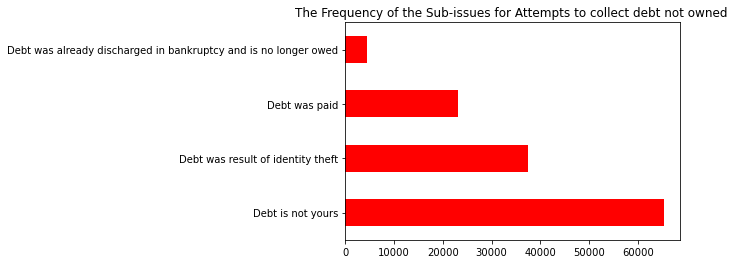

In [153]:
plot = dbt['Sub-issue'].value_counts().plot(kind = 'barh' , colormap = "flag" , title ="The Frequency of the Sub-issues for Attempts to collect debt not owned ")


### From the plot above we can conclude that the most common sub-issue for   `Attempts to collect debt not owned` & `Cont'd attempts to collect debt not owned` is  `Debt is not yours`

## Let's also take a look at the sub-issue and explore further into it and see which state suffer the most from this sub-issue and what the consumers have to say about it 

In [41]:
sub_dbt = dbt[dbt['Sub-issue'] == 'Debt is not yours']
sub_dbt.head(15)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company,States,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
5,2022-03-20,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,NaN,"EQUIFAX, INC.",Florida,33311,NaN,NaN,Web,2022-03-20,Closed with explanation,Yes,5344450
76,2019-10-05,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,"To Whom It May Concern, The reason for my dispute is CHOICE RECOVERY INC # XXXX, # XXXX\n\nwas required to notify me no later than 30 days after furnishing the negative information to credit bureau reports , in writing ... under such section 623, subsection ( 7 ) ( A ). However, in my records, I am unable to locate documentation that they complied with this requirement, which is a violation of the FCRA & FDCPA. Also, CHOICE RECOVERY INC failed to give me my "" Mini-Miranda '' five days prior to placing this derogatory item on all of my credit reports, per Section 807 ( 11 ) & FDCPA 809, Under 809. Validations of date and Mini-Mirandi under Section807 ( 1 ) CHOICE RECOVERY INC failed to send me my initial communication before placing this alleged item on my credit reports further violating the FCRA, with {$1000.00} per violationCHOICE RECOVERY INC is held liable as well for defamation and in the state of OHIO indebtedness with those of other creditors against an individual debtor or codebtors. FDCPA I fail to see where CHOICE RECOVERY INC is in compliance with OHIO LAW. I also have report this account to the FTC, and XXXX Police Dept.I need this collection account to be removed from my credit report. CHOICE RECOVERY INC has not even tried to contact me\nregarding this Fraudulent collection account. Please have them remove this collection account immediately.","Choice Recovery, Inc.",South Carolina,29732,NaN,Consent provided,Web,2019-10-05,Closed with explanation,Yes,3396765
80,2019-08-27,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,"I began to review my credit earlier this year and noticed several inaccuracies. Letters to all bureaus were mailed approximately around XX/XX/2019. Follow up letters were then mailed approximately around XX/XX/2019. Out of an abundance of concern, I requested that VALIDATION around XX/XX/2019 in accordance to the Fair Debt Collection Practices Act be provided to me timely for my personal and legal review. However, after two separate requests made timely for this, the company has failed to provide me with this validation. The company not only denies me of my rights as a consumer under this act, they also continue to employ illegal practices, reporting tactics to bureaus, and harassment methods via phone and letter. \n\nI began to review my credit earlier this year and noticed several inaccuracies. Out of an abundance of concern, I requested that VALIDATION in accordance to the Fair Debt Collection Practices Act be provided to me timely for my personal and legal review. This account was deleted from my credit reports only to be sold to another company and reported again as a new debt. They have YET TO PROVIDE ME WITH VALIDATION OF DEBT IN ACCORDANCE TO THE LAW. THEY ALSO HAVE YET TO DELETE THIS FROM MY CREDIT REPORT.","Convergent Resources, Inc.",Michigan,48186,NaN,Consent provided,Web,2019-08-27,Closed with explanation,Yes,3354704
111,2019-04-05,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,"I.C. System, Inc.",Arizona,85015,NaN,Consent not provided,Web,2019-04-05,Closed with explanation,Yes,3203165
125,2019-05-20,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,Experian Information Solutions Inc.,Georgia,30066,NaN,Consent not provided,Web,2019-05-20,Closed with non-monetary relief,Yes,3247603
171,2019-07-02,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,First star

### Retriving the rate of the sub-issue amongst different states & visualizing it

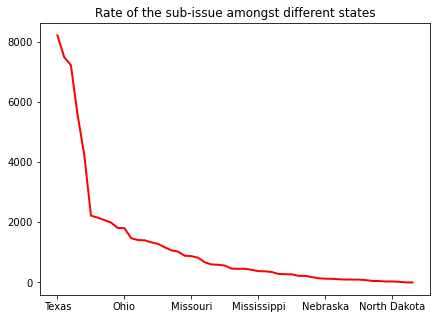

In [154]:
dbt_vals=sub_dbt['States'].value_counts().plot(kind='line' , figsize = (7,5) ,linewidth = 2 , title = "Rate of the sub-issue amongst different states" , color = 'red')
#dbt_vals.set_facecolor("violet")


# `Texas` is the most state that suffers from this sub-issue 


## Now we will take a slice of the refined data above , the slice will contain only consumers with the state `Texas` and then we will explore their narrative 

In [43]:
tex = sub_dbt[sub_dbt['States'] == 'Texas']

# Which bank in texas exactly has debt collection problem 

Text(0, 0.5, 'Number of Complains')

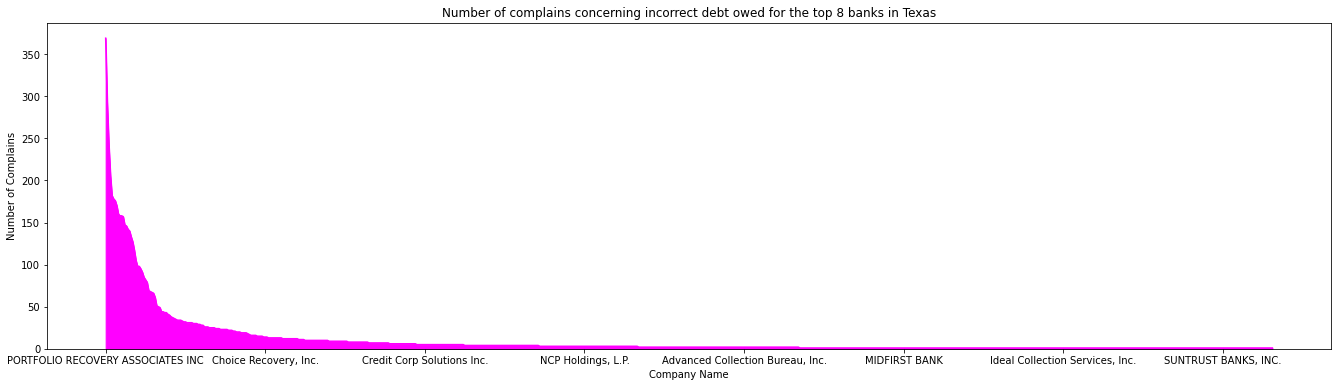

In [158]:
vals = tex['Company'].value_counts().plot(kind = 'area', figsize =(23,6), title = "Number of complains concerning incorrect debt owed for the top 8 banks in Texas",colormap='spring')
vals.set_xlabel("Company Name")
vals.set_ylabel("Number of Complains")

### `PORTFOLIO RECOVERY ASSOCIATES INC` is the bank with largest amounts of complaints on attempts to collect debt that does not belong to the consumer

Dropping the columns that has `NaN` in the consumer's narrative

In [44]:
tex.loc[:,['Sub-issue','Company','Consumer complaint narrative','States','Complaint ID','Date sent to company']].dropna()

,Sub-issue,Company,Consumer complaint narrative,States,Complaint ID,Date sent to company
364,Debt is not yours,Midwest Recovery Systems,Midwest Recovery Services XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX MO XXXX XXXX XXXX XXXX Phone On or about XX/XX/2019 I called the company. Because I had an item hit my credit. I use a sevice now and it alerts me daily on my credit. I disputed the debt and ask for validation. \n\nMidwest hit my credit AGAIN XX/XX/2019. \nThats why I called them today ... Asking why??? \n\nMr XXXX XXXX ( Very Professional ) Supervisor said that on XX/XX/XXXX it was disputed and that by XX/XX/2019 it should be taken care of. \n\nHe denies that his company hit my credit so soon again.,Texas,3301450,2019-07-12
383,Debt is not yours,WELLS FARGO & COMPANY,"I had a report of a Wells Fargo Credit Card reporting negatively on my credit report. I have never had a Wells Fargo Credit Card. I was a customer of Wells Fargo at one time but left for XXXX XXXX when I left my XXXX marriage. Wells Fargo refused to let me remove my name from the account that was linked with my husband at the time. I started trying to call WF XX/XX/XXXX to learn what this debt was. XX/XX/XXXX they sent me a packet of bills with an address different than what it should have been. They advised the card was opened in XXXX. This is the year I left my marriage and started banking with a new bank. I looked at the charges and didn't recognize them. Some of the charges were in a different state than I lived in. I called to advise them of this and they said they would open and investigation. I waited about 2 months and didn't hear anything back so I called again. They advised no investigation was ever started. They put me on hold for 45 minutes as they were "" looking into it '' then hung up on me. I called back. They advised that they could see an investigation had been started and I would hear from someone. I asked how I would hear from them and they couldn't answer. I had to force them to take my new contact information. I waited 2 more months and again heard nothing. I called back again but this time to the corporate office. They listened to my complaints about nothing ever happening. Assured me an investigation would happen and that they would personally call me back. They confirmed the address that the address was opened in and I advised that was NOT my address at the time. They also said that my name was the only name on the account. I never received a call back but I did receive a letter and a check for {$270.00} for all of my trouble. I was advised that it had been removed off of my report. I thought it was done. A couple of weeks later I received a letter stating that my report was denied and they found it to be my debt. I called and told them I wanted proof and they told me they couldn't provide me with proof that they didn't have to and that they were going to put it back on my credit report. I contacted the corporate office again and complained. Again they assured me that the case manager would reopen the investigation and that she would personally call me back. They told me to wait until XX/XX/XXXX and if I hadn't heard from her to call her directly. I have called her several times and she will not return my call. I received a letter from her stating the debt is mine only this time they sent completely different invoices before and this time they have my then underage daughters name on the account as well. I have called multiple times to ask someone about the discrepancies and they refuse to call me back or provide legitimate proof that this debt is mine. I am fully aware that Wells Fargo was in a lot of trouble for their employees opening credit accounts in customers names without their permission. I don't know if this is what happened but they won't even acknowledge it. They keep saying it's my debt but refuse to speak to me on the phone or show me proof. I am extremely frustrated.",Texas,3297736,2019-07-06
903,Debt is not yours,Midwest Rec

### After taking a breif look at some of the narratives it seemed to me the following:
###  
From the few tables i have thoroughly read , it appears that the consumers are being subjected towards some sort of threats and harrassments from their debt-collectors. According to their narrative they could be facing the following :
*  Their debt collector has inaccurate information about them 
*  Someone may opened an account by their name and didn't pay some due bills
*  They happened to fall victim for an unscrupulous debt-collector

# How many times a consumer mentioned anything fraud related ?

The code below seperates all texts into seprate words and stores them in a list , then it splits the words from the lists and adds them to a column called `Word` then the column word is summed and the result is stored in the column `count` which is the number of times that this word appeared in the DataFrame 

In [45]:
tex ['Word'] = tex ['Consumer complaint narrative'].str.split()
res = tex .drop('Consumer complaint narrative', 1).explode('Word').groupby(['Word'])['Word'].agg(['count']).reset_index()
print(res)

C:\Users\COMPUM~1\AppData\Local\Temp/ipykernel_13548/3035293314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tex ['Word'] = tex ['Consumer complaint narrative'].str.split()
C:\Users\COMPUM~1\AppData\Local\Temp/ipykernel_13548/3035293314.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  res = tex .drop('Consumer complaint narrative', 1).explode('Word').groupby(['Word'])['Word'].agg(['count']).reset_index()


               Word  count
0                 "    721
1      "...Disputes      1
2      "...disputes      1
3             "100%      1
4               "As      1
...             ...    ...
18267         |XXXX      2
18268             }     22
18269            },      1
18270             ~      2
18271         ~XXXX      1

[18272 rows x 2 columns]


In [46]:
Words = pd.DataFrame(res)
Words

,Word,count
0,"""",721
1,"""...Disputes",1
2,"""...disputes",1
3,"""100%",1
4,"""As",1
...,...,...
18267,|XXXX,2
18268,},22
18269,"},",1
18270,~,2


As we can see , there are many special characters that are unnecessary

In [47]:
Words.head(50)

,Word,count
0,"""",721
1,"""...Disputes",1
2,"""...disputes",1
3,"""100%",1
4,"""As",1
5,"""CONTACT",1
6,"""Corner",1
7,"""On",1
8,"""Priority""",1
9,"""Terms",1


These lines of codes takes care of the problem mentioned above...

In [48]:
special_char = ['"', '*', '/', '(', ')', ':', '\n','-','+','=','`','$','%','^','!','.',' ']

special_char_escaped = list(map(re.escape, special_char))

Words['Word'] = Words['Word'].replace(special_char_escaped, '', regex=True)

In [49]:
Words.head(100)

,Word,count
0,,721
1,Disputes,1
2,disputes,1
3,100,1
4,As,1
...,...,...
95,"XXXX,",1
96,c,1
97,collection,1
98,exterior,1


# A list is then created that contains all the possible words that is related to the Problem that the debt does not belong to the customer and that the debt-collector is being unscrupulous

In [155]:
not_my = ["debt isn't yours", 'dispute', 'dispute it','30 days','DISPUTE','Dispute','Disputes',"Not Mine","NOT MINE","not mine",'else','Excessive','excessive','harassed','harasser','fake',"FAKE",'Fake','Threaten','threaten','phone calls','unscrupulous','Unscrupulous','UNSCRUPULOUS']

The data speaks for itself...

In [156]:
Words.loc[Words['Word'].isin(not_my)]

,Word,count
1,Disputes,1
118,DISPUTE,1
2210,DISPUTE,16
2364,Dispute,33
2368,Disputes,4
5619,Threaten,5
9490,dispute,580
9491,dispute,1
9494,dispute,56
9791,else,82


# Final Conclusions

### 1 - Debt collection problems mostly come from debt-collectors attempting to collect debt that is owed to the wrong consumer

### 2 - Texas is the most state that suffers from debt-collection problems

### 3 - Most of the attempts of collecting debts that is not owed is that the debt does not belong to the consumer

### 4 - The reasons that there are attempts to collect debt not owed are:
*  Their debt collector has inaccurate information about them 
*  Someone may opened an account by their name and didn't pay some due bills
*  They happened to fall victim for an unscrupulous debt-collector

### 5 - `PORTFOLIO RECOVERY ASSOCIATES INC` is the bank with largest amounts of complaints on attempts to collect debt that does not belong to the consumer

The following snapshot is extracted from `consumerlawfirm.com`
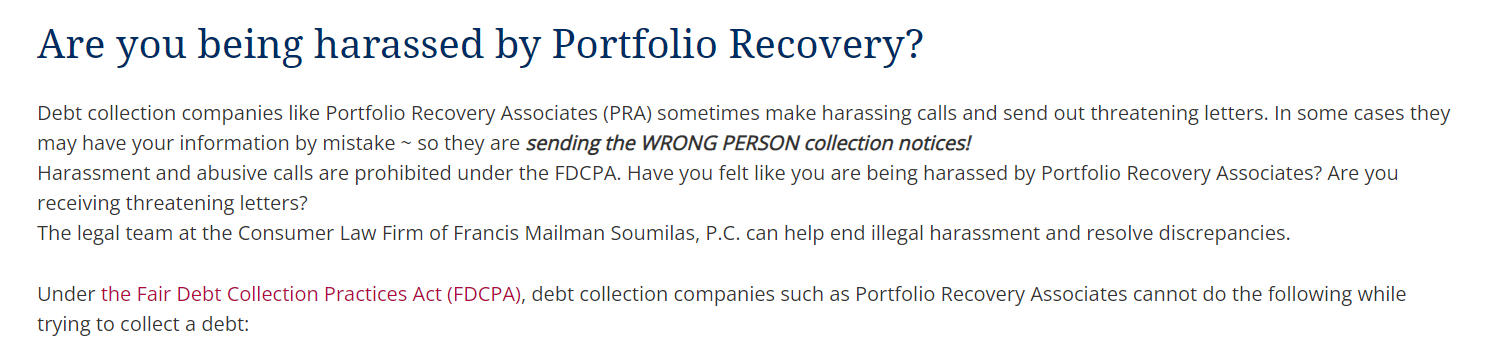

Unfortunately the article requires a subscription 
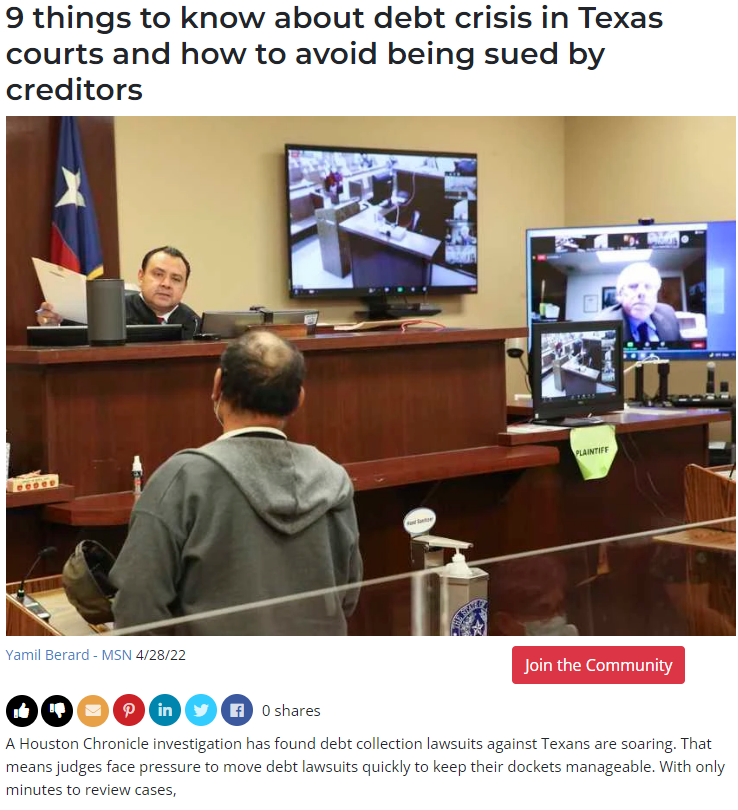

From `houstonchronicle.com`
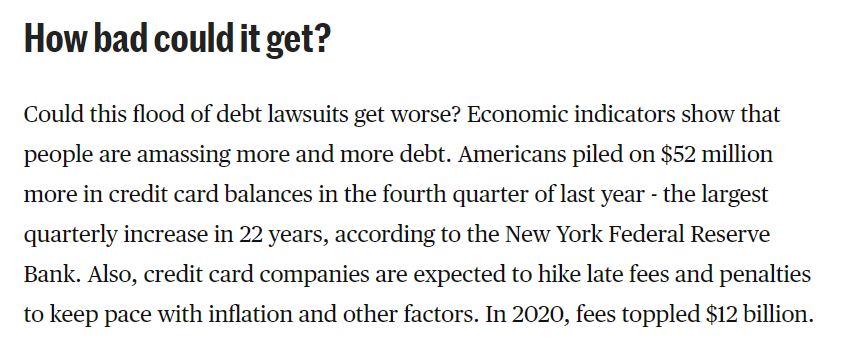

# —————————————————————————————————————

<h1><center>Hypothesis</center></h1>


#### After asking two questions realted to the cause of two issues in our previous analysis , which are :
*  What are the most frequent issues and sub-issues the students complain about? and can their narrative potentially imply that there's some cases of scam? 

* Which issue related to debt collection is ubiquitous? and what are the reason/s behind it?which state suffers the most from this issue?

<h3><center>Hypothesis Formulation & Testing</center></h3>


### We will  hypothesize if the issues are related to the Tri State area at significant level 5% 

###### (The `Red` areas are the Tri State area)
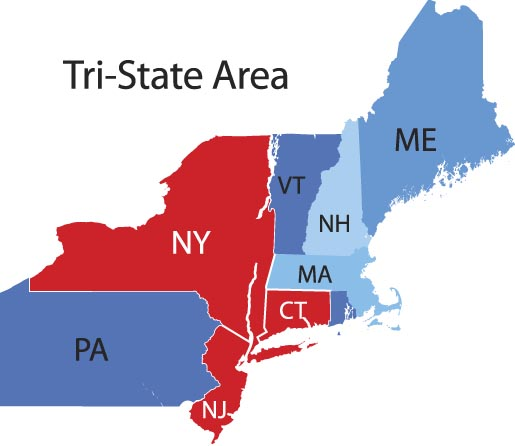

#### Population: 31,483,000
#### Per Capita Income: 41,653$

The Tri-State Region, commonly referred to as the greater New York (City) area, is made up of three states: New York (NY), New Jersey (NJ) and Connecticut (CT). Geographically and economically, the Tri-State encompasses areas within a commutable distance of Manhattan (by car, bus or train), or the coverage area of the broadcast television stations that operate from New York City. With the inclusion of Manhattan in New York, Stamford and Hartford in Connecticut, and Jersey City in New Jersey, the Tri-state Region is home to the largest and most-recognized collection of high-rise office real estate, and a seat to the bulk of banking and financial institutions in the U.S. In the same manner, the inclusion of Fairfield County in southwestern CT, Manhattan, Westchester and Long Island in NY, and a number of counties in northern NJ, cumulatively make the Tri-state Region one of the most expensive residential real estate markets in the nation.

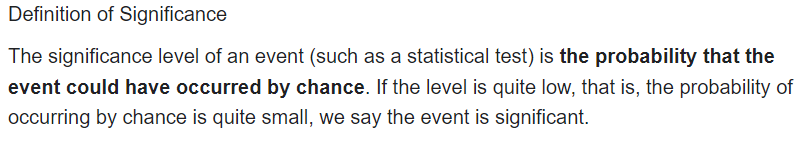

 
<h3><center>To test out hypothesis we will use the Chi-Square test as our hypothesis test</center></h3>


Chi-square is one of the most helpful and useful tests when it comes to comparing the correlation between two categorial variables.

#### The test could have two results:
**H0** (Null Hypothesis) = The 2 variables proposed to the hypothesis are independent.<br>
**H1** (Alternate Hypothesis) = The 2 variables are dependent.

#### In terms of our hpothesis:
**H0** (Null Hypothesis) = There is **NO** relationship between the number of complains and the tri state area, at 5% significant level
, ( the two variables are independent)<br>
**H1** (Alternate Hypothesis) = There is a relationship between the two proposed variables.


<h3><center>Chi-Square test pipeline</center></h3>


### Chi-Square Steps
<ol>
    <strong>
<li>Collect observed frequency data</li>
<li>Calculate expected frequency data</li>
<li>Determine Degrees of Freedom</li>
<li>Calculate the chi square</li>
</ol>
<br>
If the chi square statistic exceeds the probability or table value (based upon a p-value of x and n degrees of freedom) the null hypothesis should be rejected.

<h3><center>But first we need to collect and wrangle the data for our hypothesis testing</center></h3>

#### we will just modifiy the `State` part , as it was only modified in the slice that was related to the debt


In [45]:
hyp = complains.loc[:,['State','Issue']]
hyp

,State,Issue
0,FL,Struggling to repay your loan
1,MD,Problem with a credit reporting company's investigation into an existing problem
2,FL,Incorrect information on your report
3,CA,Problem with a credit reporting company's investigation into an existing problem
4,NY,Problem with a purchase or transfer
...,...,...
2550836,IL,Disclosure verification of debt
2550841,KY,Can't repay my loan
2550842,CA,Dealing with my lender or servicer
2550844,NC,Communication tactics


In [46]:
hyp["States"]=hyp["State"].map(States_Dict)
hyp

,State,Issue,States
0,FL,Struggling to repay your loan,Florida
1,MD,Problem with a credit reporting company's investigation into an existing problem,Maryland
2,FL,Incorrect information on your report,Florida
3,CA,Problem with a credit reporting company's investigation into an existing problem,California
4,NY,Problem with a purchase or transfer,New York
...,...,...,...
2550836,IL,Disclosure verification of debt,Illinois
2550841,KY,Can't repay my loan,Kentucky
2550842,CA,Dealing with my lender or servicer,California
2550844,NC,Communication tactics,North Carolina


In [47]:
del hyp['State']
hyp

,Issue,States
0,Struggling to repay your loan,Florida
1,Problem with a credit reporting company's investigation into an existing problem,Maryland
2,Incorrect information on your report,Florida
3,Problem with a credit reporting company's investigation into an existing problem,California
4,Problem with a purchase or transfer,New York
...,...,...
2550836,Disclosure verification of debt,Illinois
2550841,Can't repay my loan,Kentucky
2550842,Dealing with my lender or servicer,California
2550844,Communication tactics,North Carolina


In [48]:
tri = hyp[hyp['States'].isin(['New York','New Jersey','Connecticut'])]
tri

,Issue,States
4,Problem with a purchase or transfer,New York
28,Managing an account,Connecticut
32,Incorrect information on your report,New York
35,Problem with a credit reporting company's investigation into an existing problem,Connecticut
44,Managing an account,New York
...,...,...
2550762,False statements or representation,New York
2550782,Attempts to collect debt not owed,Connecticut
2550783,Dealing with your lender or servicer,New York
2550808,Attempts to collect debt not owed,New York


<AxesSubplot:title={'center':'Count of each issue type in the Tri State area'}>

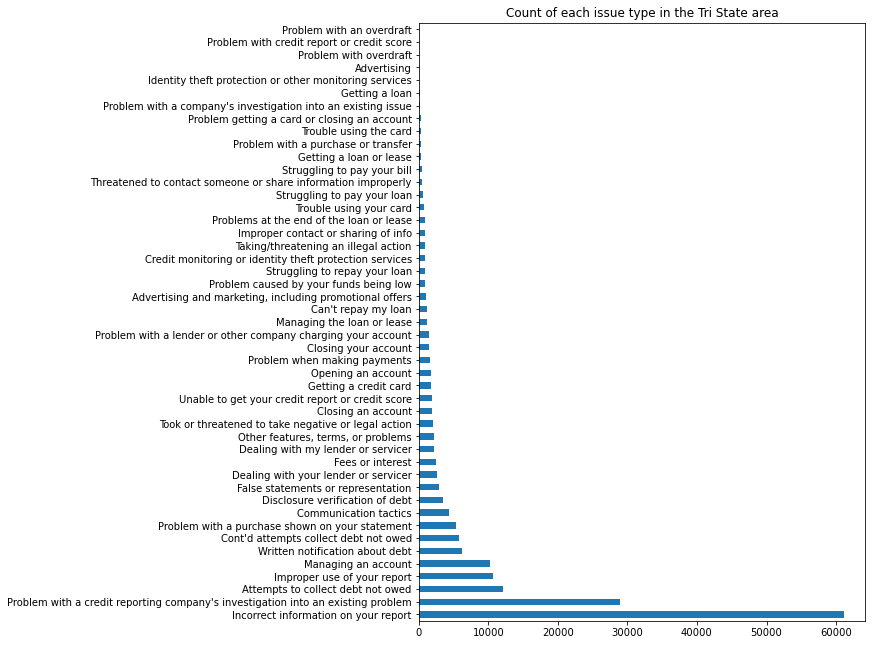

In [80]:
tri['Issue'].value_counts().plot(kind = 'barh' , figsize=(8,11) ,title = 'Count of each issue type in the Tri State area')

## Calculating Chi Score

## Step 1: Collect observed frequency data

##### Retriving our new rows and columns

In [50]:
rows=tri['States'].unique()
cols=tri['Issue'].unique()


##### Counting the values

In [51]:
matrix=[]
for i in rows:
    l=[]
    for j in cols:
        l.append(len(tri[(tri['States']==i) & (tri['Issue']==j)]))
    matrix.append(l)
matrix

[[222,
  6292,
  38606,
  18414,
  6777,
  1139,
  573,
  639,
  1002,
  3668,
  1620,
  7531,
  557,
  549,
  1045,
  3371,
  936,
  845,
  1349,
  305,
  1494,
  183,
  1260,
  430,
  289,
  1616,
  2463,
  1239,
  271,
  510,
  1217,
  421,
  131,
  154,
  212,
  20,
  3342,
  1291,
  465,
  2143,
  645,
  487,
  77,
  36,
  4,
  1,
  2],
 [26,
  1196,
  3470,
  1916,
  859,
  161,
  143,
  86,
  151,
  441,
  308,
  849,
  125,
  116,
  183,
  482,
  107,
  163,
  209,
  73,
  258,
  33,
  121,
  81,
  45,
  280,
  436,
  177,
  41,
  72,
  138,
  86,
  25,
  21,
  34,
  3,
  573,
  279,
  75,
  255,
  127,
  105,
  10,
  8,
  0,
  0,
  1],
 [96,
  2720,
  19063,
  8538,
  3068,
  796,
  440,
  316,
  515,
  2042,
  680,
  3655,
  246,
  265,
  475,
  1481,
  413,
  386,
  632,
  205,
  674,
  90,
  511,
  191,
  115,
  1010,
  1376,
  508,
  146,
  342,
  467,
  318,
  47,
  72,
  132,
  8,
  1925,
  666,
  334,
  1030,
  356,
  250,
  63,
  22,
  1,
  0,
  0]]

# Creating a dataframe

In [52]:
pd.DataFrame(matrix,index=rows,columns=cols)

,Problem with a purchase or transfer,Managing an account,Incorrect information on your report,Problem with a credit reporting company's investigation into an existing problem,Improper use of your report,Took or threatened to take negative or legal action,Managing the loan or lease,"Advertising and marketing, including promotional offers",Problem when making payments,Written notification about debt,...,Dealing with my lender or servicer,Taking/threatening an illegal action,Disclosure verification of debt,Can't repay my loan,Improper contact or sharing of info,Getting a loan,Identity theft protection or other monitoring services,Problem with overdraft,Problem with an overdraft,Problem with credit report or credit score
New York,222,6292,38606,18414,6777,1139,573,639,1002,3668,...,1291,465,2143,645,487,77,36,4,1,2
Connecticut,26,1196,3470,1916,859,161,143,86,151,441,...,279,75,255,127,105,10,8,0,0,1
New Jersey,96,2720,19063,8538,3068,796,440,316,515,2042,...,666,334,1030,356,250,63,22,1,0,0


In [75]:
observedValues=pd.DataFrame(matrix,index=rows,columns=cols)

#### After Counting, not we will sum the rows and the columns

In [54]:
observedValues.sum()

Problem with a purchase or transfer                                                   344
Managing an account                                                                 10208
Incorrect information on your report                                                61139
Problem with a credit reporting company's investigation into an existing problem    28868
Improper use of your report                                                         10704
Took or threatened to take negative or legal action                                  2096
Managing the loan or lease                                                           1156
Advertising and marketing, including promotional offers                              1041
Problem when making payments                                                         1668
Written notification about debt                                                      6151
Dealing with your lender or servicer                                                 2608
Attempts t

#### Then we will add the column `Total` to our DataFrame

In [55]:
observedValues.loc['Total']=observedValues.sum()

In [56]:
observedValues

,Problem with a purchase or transfer,Managing an account,Incorrect information on your report,Problem with a credit reporting company's investigation into an existing problem,Improper use of your report,Took or threatened to take negative or legal action,Managing the loan or lease,"Advertising and marketing, including promotional offers",Problem when making payments,Written notification about debt,...,Dealing with my lender or servicer,Taking/threatening an illegal action,Disclosure verification of debt,Can't repay my loan,Improper contact or sharing of info,Getting a loan,Identity theft protection or other monitoring services,Problem with overdraft,Problem with an overdraft,Problem with credit report or credit score
New York,222,6292,38606,18414,6777,1139,573,639,1002,3668,...,1291,465,2143,645,487,77,36,4,1,2
Connecticut,26,1196,3470,1916,859,161,143,86,151,441,...,279,75,255,127,105,10,8,0,0,1
New Jersey,96,2720,19063,8538,3068,796,440,316,515,2042,...,666,334,1030,356,250,63,22,1,0,0
Total,344,10208,61139,28868,10704,2096,1156,1041,1668,6151,...,2236,874,3428,1128,842,150,66,5,1,3


Summing the rows

In [58]:
observedValues['Total']=observedValues.sum(axis=1)

In [59]:
observedValues

,Problem with a purchase or transfer,Managing an account,Incorrect information on your report,Problem with a credit reporting company's investigation into an existing problem,Improper use of your report,Took or threatened to take negative or legal action,Managing the loan or lease,"Advertising and marketing, including promotional offers",Problem when making payments,Written notification about debt,...,Taking/threatening an illegal action,Disclosure verification of debt,Can't repay my loan,Improper contact or sharing of info,Getting a loan,Identity theft protection or other monitoring services,Problem with overdraft,Problem with an overdraft,Problem with credit report or credit score,Total
New York,222,6292,38606,18414,6777,1139,573,639,1002,3668,...,465,2143,645,487,77,36,4,1,2,115843
Connecticut,26,1196,3470,1916,859,161,143,86,151,441,...,75,255,127,105,10,8,0,0,1,14348
New Jersey,96,2720,19063,8538,3068,796,440,316,515,2042,...,334,1030,356,250,63,22,1,0,0,56686
Total,344,10208,61139,28868,10704,2096,1156,1041,1668,6151,...,874,3428,1128,842,150,66,5,1,3,186877


#### Now that the first step is done.
#### We will head over to 
## Step2: Calculate expected frequency data

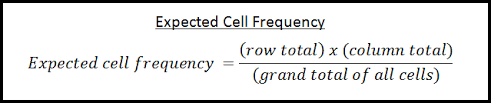

In [61]:
matrix=[]
for i in rows:
    l=[]
    for j in cols:
        v=(observedValues.loc[i,'Total']*observedValues.loc['Total',j])/observedValues.loc['Total','Total']
        l.append(v)
    matrix.append(l)
matrix

[[213.24182216110063,
  6327.827094827078,
  37899.39466601027,
  17894.956169030967,
  6635.292047710526,
  1299.2873815397293,
  716.5917047041637,
  645.3044676444935,
  1033.974881874174,
  3812.9373491654937,
  1616.6705587097395,
  7460.36433054897,
  575.2570086206435,
  576.4967866564639,
  1055.6709975010301,
  3306.48802153288,
  902.5584100772165,
  864.1252909667857,
  1357.556949223286,
  361.39529744163275,
  1503.8507574500875,
  189.68603948051393,
  1172.8300218860534,
  435.1620905729437,
  278.33016904166914,
  1801.397486046972,
  2650.0255515660033,
  1192.666470459179,
  283.9091702028607,
  572.7774525490029,
  1129.4377906323411,
  511.4084397758954,
  125.83747063576577,
  153.11258742381352,
  234.3180487700466,
  19.21655955521546,
  3620.1518645954293,
  1386.071844047154,
  541.783001653494,
  2124.979553396084,
  699.2348122026788,
  521.9465530803684,
  92.98335268652643,
  40.91267518207163,
  3.099445089550881,
  0.6198890179101763,
  1.8596670537305287

In [62]:
expectedF=pd.DataFrame(matrix,index=rows,columns=cols)
expectedF

,Problem with a purchase or transfer,Managing an account,Incorrect information on your report,Problem with a credit reporting company's investigation into an existing problem,Improper use of your report,Took or threatened to take negative or legal action,Managing the loan or lease,"Advertising and marketing, including promotional offers",Problem when making payments,Written notification about debt,...,Dealing with my lender or servicer,Taking/threatening an illegal action,Disclosure verification of debt,Can't repay my loan,Improper contact or sharing of info,Getting a loan,Identity theft protection or other monitoring services,Problem with overdraft,Problem with an overdraft,Problem with credit report or credit score
New York,213.241822,6327.827095,37899.394666,17894.956169,6635.292048,1299.287382,716.591705,645.304468,1033.974882,3812.937349,...,1386.071844,541.783002,2124.979553,699.234812,521.946553,92.983353,40.912675,3.099445,0.619889,1.859667
Connecticut,26.411554,783.747513,4694.116301,2216.420769,821.829289,160.926213,88.755106,79.925662,128.065326,472.260086,...,171.675102,67.103774,263.194208,86.605329,64.646885,11.516666,5.067333,0.383889,0.076778,0.230333
New Jersey,104.346624,3096.425392,18545.489033,8756.623062,3246.878664,635.786405,350.653189,315.769870,505.959792,1865.802565,...,678.253054,265.113224,1039.826239,342.159859,255.406562,45.499981,20.019992,1.516666,0.303333,0.910000


In [63]:
observedValues.drop('Total',axis=1,inplace=True)
observedValues.drop('Total',axis=0,inplace=True)

In [64]:
observedValues

,Problem with a purchase or transfer,Managing an account,Incorrect information on your report,Problem with a credit reporting company's investigation into an existing problem,Improper use of your report,Took or threatened to take negative or legal action,Managing the loan or lease,"Advertising and marketing, including promotional offers",Problem when making payments,Written notification about debt,...,Dealing with my lender or servicer,Taking/threatening an illegal action,Disclosure verification of debt,Can't repay my loan,Improper contact or sharing of info,Getting a loan,Identity theft protection or other monitoring services,Problem with overdraft,Problem with an overdraft,Problem with credit report or credit score
New York,222,6292,38606,18414,6777,1139,573,639,1002,3668,...,1291,465,2143,645,487,77,36,4,1,2
Connecticut,26,1196,3470,1916,859,161,143,86,151,441,...,279,75,255,127,105,10,8,0,0,1
New Jersey,96,2720,19063,8538,3068,796,440,316,515,2042,...,666,334,1030,356,250,63,22,1,0,0


#### Step 2 done!
### let's Determine Degree of Freedom

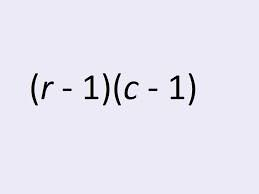

In [65]:
expectedF.shape

(3, 47)

In [66]:
free=(expectedF.shape[0]-1)*(expectedF.shape[1]-1)
free

92

####  Step 3 done!
### let's Calculate the chi square

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQiY4aA2NBkACxANJ-Wo-y17Yaw-RgyV6cf_w&usqp=CAU'>

#### We have observed values and expected, so let's calculate the chi score
### We need to shape the data into the fimmilar chi-square table

In [67]:
observedValues.values.flatten()

array([  222,  6292, 38606, 18414,  6777,  1139,   573,   639,  1002,
        3668,  1620,  7531,   557,   549,  1045,  3371,   936,   845,
        1349,   305,  1494,   183,  1260,   430,   289,  1616,  2463,
        1239,   271,   510,  1217,   421,   131,   154,   212,    20,
        3342,  1291,   465,  2143,   645,   487,    77,    36,     4,
           1,     2,    26,  1196,  3470,  1916,   859,   161,   143,
          86,   151,   441,   308,   849,   125,   116,   183,   482,
         107,   163,   209,    73,   258,    33,   121,    81,    45,
         280,   436,   177,    41,    72,   138,    86,    25,    21,
          34,     3,   573,   279,    75,   255,   127,   105,    10,
           8,     0,     0,     1,    96,  2720, 19063,  8538,  3068,
         796,   440,   316,   515,  2042,   680,  3655,   246,   265,
         475,  1481,   413,   386,   632,   205,   674,    90,   511,
         191,   115,  1010,  1376,   508,   146,   342,   467,   318,
          47,    72,

#### `.values.flatten()` will be used to convert DataFrame to 1D-array

In [68]:
chiScoreTable=pd.DataFrame(observedValues.values.flatten(),columns=['O'])
chiScoreTable

,O
0,222
1,6292
2,38606
3,18414
4,6777
...,...
136,63
137,22
138,1
139,0


#### Let's add Expected value

In [69]:

chiScoreTable['E']=expectedF.values.flatten()
chiScoreTable

,O,E
0,222,213.241822
1,6292,6327.827095
2,38606,37899.394666
3,18414,17894.956169
4,6777,6635.292048
...,...,...
136,63,45.499981
137,22,20.019992
138,1,1.516666
139,0,0.303333


#### Let's calculate O-E

In [70]:

chiScoreTable['O-E']=chiScoreTable['O']-chiScoreTable['E']
chiScoreTable

,O,E,O-E
0,222,213.241822,8.758178
1,6292,6327.827095,-35.827095
2,38606,37899.394666,706.605334
3,18414,17894.956169,519.043831
4,6777,6635.292048,141.707952
...,...,...,...
136,63,45.499981,17.500019
137,22,20.019992,1.980008
138,1,1.516666,-0.516666
139,0,0.303333,-0.303333


#### Let's calculate (O-E)²

In [76]:

chiScoreTable['(O-E)²']=chiScoreTable['O-E']**2
chiScoreTable

,O,E,O-E,(O-E)^2,((O-E)^2)\E,(O-E)²
0,222,213.241822,8.758178,76.705679,0.359712,76.705679
1,6292,6327.827095,-35.827095,1283.580724,0.202847,1283.580724
2,38606,37899.394666,706.605334,499291.098023,13.174118,499291.098023
3,18414,17894.956169,519.043831,269406.498467,15.054885,269406.498467
4,6777,6635.292048,141.707952,20081.143742,3.026414,20081.143742
...,...,...,...,...,...,...
136,63,45.499981,17.500019,306.250656,6.730786,306.250656
137,22,20.019992,1.980008,3.920433,0.195826,3.920433
138,1,1.516666,-0.516666,0.266944,0.176007,0.266944
139,0,0.303333,-0.303333,0.092011,0.303333,0.092011


In [72]:
## Let's calculate ((O-E)^2)\E
chiScoreTable['((O-E)^2)\E']=chiScoreTable['(O-E)^2']/chiScoreTable['E']
chiScoreTable

,O,E,O-E,(O-E)^2,((O-E)^2)\E
0,222,213.241822,8.758178,76.705679,0.359712
1,6292,6327.827095,-35.827095,1283.580724,0.202847
2,38606,37899.394666,706.605334,499291.098023,13.174118
3,18414,17894.956169,519.043831,269406.498467,15.054885
4,6777,6635.292048,141.707952,20081.143742,3.026414
...,...,...,...,...,...
136,63,45.499981,17.500019,306.250656,6.730786
137,22,20.019992,1.980008,3.920433,0.195826
138,1,1.516666,-0.516666,0.266944,0.176007
139,0,0.303333,-0.303333,0.092011,0.303333


## Chi Score is the sum of ((O-E)^2)\E Column

In [73]:
chiScore=chiScoreTable['((O-E)^2)\E'].sum()
chiScore

1689.1914597207751

#### If the chi square statistic exceeds the probability or table value (based upon a p-value of x (which is the significant level) and n degrees of freedom) the null hypothesis should be rejected.

#### let's Get Tabular Value of chi tablue that Freedom is 92 and p-value is 0.05

In [74]:
deg_f = 92
sig = 0.05

chi2.ppf(1-sig, deg_f)

115.38978970826685

# Our calculated value is higher than the tabular vlaue , therefore our null hypothesis is rejected and there is a relationship between the issues and the tri state area